In [1]:
import pandas as pd
#2011 census from pordata.pt - Men demographic distribution in several Counties (external data)
Men=pd.read_excel('faixasEtariasHomens_2011_Porto_Lisboa_areas.xlsx', sheet_name=0, header=0)
#2011 census from pordata.pt - Women demographic distribution in several Counties (external data)
Women=pd.read_excel('faixasEtariasMulheres_2011_Porto_Lisboa_areas.xlsx', sheet_name=0, header=0)
#User Proflie
Churn_UsersProfile=pd.read_csv('Churn_UsersProfile.txt', sep="|", header=0, encoding = 'unicode_escape')
#OD Men
Churn_OD=pd.read_csv('Churn_OD.txt', sep="|", header=0, encoding = 'unicode_escape')
#Parish names (external data, accessed on https://www.factorvirtual.com/storage/app/media/Ferramentas/Dados/DistritosConcelhosFreguesias_CAOP2013_Populacao_Censos2011_csv.zip)
Parish_name=pd.read_csv('Dicofre_ParishName.csv', header=0, encoding = 'unicode_escape', sep=';')

C:\Users\lucia\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lucia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\lucia\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


# Summary
### We have developed a direct graphical inspection tool for the biggest users groups as well as the main churn groups for each origin county/destination parish (OD)  pair. The analysis herein presented was split into four parts: pre-covid and pos-covid, and for each of the two metropolitan areas of origin of the bus travelers.

### We have performed PCA analysis on the top of all the destination parishes variables with the number of travelers in each group normalized by the population in their respective age/gender group and from the respective origin county although using demographic data from the Portuguese Census 2011. This allows for a better comparison between all the represented groups. 

### We are also making as a quite strong assumption that demand weight is transversal to all segments and the two periods, but despite demand by segment might indeed be different, it probably is not more different than let's say +/- 30 % from the mean to that OD pair demand weight (it is always better than knowing nothing about their main destinations from any origin county). Demand weight might also probably not change too much after covid.

### PCA visuals clearly indicate the highest correlated OD pairs where the lower coordinates in a branch discover  the churner groups on that OD pair while the intensive users in that same OD pair are at the higher coordinates of the same branch.

# 1- EDA

## Relevant demographic distribution of each County in Portugal from 2011 data (external data)

In [2]:
#next steps mostly involve drop of non relevant rows and colums, either because they are empty or not relevant for this user case
Men_=Men.drop(range(9), axis=0)
Women_=Women.drop(range(9), axis=0)

In [3]:
#rename columns for easier handling
Men_.columns=range(256) 
Women_.columns=range(256)

In [4]:
#drop emply columns
Men_=Men_.drop(range(19,256), axis=1)
Women_=Women_.drop(range(19,256), axis=1)

In [5]:
Men_=Men_.drop(0, axis=1)
Men_=Men_.drop(10, axis=0)
Women_=Women_.drop(0, axis=1)
Women_=Women_.drop(10, axis=0)

In [6]:
#drp empty rows
Men_=Men_.drop(range(193,216), axis=0)
Women_=Women_.drop(range(46,69), axis=0)

In [7]:
Men_.columns = Men_.iloc[0] # rename colums names equal to row[0]
Women_.columns = Women_.iloc[0] #rename colums names equal to row[0]
Men_=Men_.drop(9, axis=0) # drop the row with the column names
Women_=Women_.drop(9, axis=0) # drop the row with the column names

In [8]:
Men_=Men_.reset_index().drop('index', axis=1) #rest index for index starting on 0 and drop respective column created 
Women_=Women_.reset_index().drop('index', axis=1) #rest index for index starting on 0 and drop respective column created 

In [9]:
#drop age range columns not relevant for this churn problem
Men_=Men_.drop(["0-04", "05-09", "10-14"], axis=1)
Women_=Women_.drop(["0-04", "05-09", "10-14"], axis=1)

In [10]:
#convert object columns to numeric columns

Columns=Women_.columns
Women_[Columns[1:]] = Women_[Columns[1:]].apply(pd.to_numeric)
        
Columns2=Men_.columns
Men_[Columns[1:]] = Men_[Columns[1:]].apply(pd.to_numeric)

In [11]:
#sum age ranges according to Churn dataset age range
Men_['15-24'] = Men_['15-19'] + Men_['20-24']
Men_['25-34'] = Men_['25-29'] + Men_['30-34']
Men_['35-44'] = Men_['35-39'] + Men_['40-44']
Men_['45-54'] = Men_['45-49'] + Men_['50-54']
Men_['55-64'] = Men_['55-59'] + Men_['60-64']
Men_['65+'] = Men_['65-69'] + Men_['70-74'] + Men_['75 ou mais']

In [12]:
#sum age ranges according to Churn dataset age range
Women_['15-24'] = Women_['15-19'] + Women_['20-24']
Women_['25-34'] = Women_['25-29'] + Women_['30-34']
Women_['35-44'] = Women_['35-39'] + Women_['40-44']
Women_['45-54'] = Women_['45-49'] + Women_['50-54']
Women_['55-64'] = Women_['55-59'] + Women_['60-64']
Women_['65+'] = Women_['65-69'] + Women_['70-74'] + Women_['75 ou mais']

In [13]:
#drop the now not relevant columns
Men_=Men_.drop(["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75 ou mais"], axis=1)
Women_=Women_.drop(["15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75 ou mais"], axis=1)

In [14]:
Women_.columns=['County','Total','15-24','25-34','35-44','45-54','55-64', '65+'] #rename columns
Men_.columns=['County','Total','15-24','25-34','35-44','45-54','55-64', '65+'] #rename columns

In [15]:
Women_.describe()

,Total,15-24,25-34,35-44,45-54,55-64,65+
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,68796.542857,6932.514286,9491.171429,10628.342857,9669.342857,8892.314286,13349.542857
std,58760.634930,5654.772702,7956.063357,8607.283752,7858.096278,7642.278455,14469.757436
min,9075.000000,820.000000,1301.000000,1652.000000,1157.000000,934.000000,1468.000000
25%,32897.500000,3363.000000,4446.000000,5203.500000,4566.000000,3914.500000,5606.000000
50%,48842.000000,5489.000000,7477.000000,8238.000000,7334.000000,6290.000000,9585.000000
75%,91758.500000,8940.500000,12129.500000,13784.000000,12580.500000,12440.000000,17653.000000
max,296859.000000,26527.000000,39697.000000,38906.000000,37068.000000,38423.000000,81737.000000


## Analysis of User Profiles and OD data

In [16]:
Churn_UsersProfile.head(10)

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092
5,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,15-24,1148.427051
6,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,25-34,421.940180
7,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,35-44,137.697607
8,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,45-54,617.693161
9,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Male,55-64,867.481913


In [17]:
set(Churn_UsersProfile['Region_of_Origin'])

{'R1 - AM Lisboa', 'R2 - AM Porto'}

In [18]:
Churn_OD.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341


In [19]:
#convert dicofre parish codes to names of parish (external data)
Parish_name['Freguesia (FR)']=Parish_name['Freguesia (FR)'].str.strip("'") # remove ' from code number

In [20]:
list_wrong_codes=['0302FA','0302FB','0302FC','0302FD','0302FE','0302FF','0302FG','0302FH'] # not standard codes
index_values=[]
for ind in list_wrong_codes:
    a = Parish_name[Parish_name['Freguesia (FR)']==ind ].index
    index_values.append(a.values.tolist()[0])

In [21]:
Parish_name=Parish_name.drop(index_values, axis=0) # drop rows with those not standard codes for allowing conversion to int type
Parish_name['Freguesia (FR)']=Parish_name['Freguesia (FR)'].astype(int) 

In [22]:
Churn_OD['Dicofre_ParishCode_of_Public_Transportation'].dtypes

dtype('int64')

In [23]:
#map dicofre references to the name of Parish
dicofre=Parish_name['Freguesia (FR)']
name=Parish_name['Designação FR']
code_name_map = dict(zip(dicofre, name))
Churn_OD['Dest_Parish'] = Churn_OD['Dicofre_ParishCode_of_Public_Transportation'].map(code_name_map)

In [24]:
Churn_OD = Churn_OD[Churn_OD['Demand_weight']>=0.00005] # drop destinations with practically no demand at all, 
#we just want analyse bus lines that are usefull but have low number of clients in order to understand those better!!

In [25]:
# Perform separate analysis by region of origin
Churn_OD_Lisbon=Churn_OD[Churn_OD['Region_of_Origin']=='R1 - AM Lisboa']
Churn_OD_Porto=Churn_OD[Churn_OD['Region_of_Origin']=='R2 - AM Porto']
Churn_UsersProfile_Lisbon=Churn_UsersProfile[Churn_UsersProfile['Region_of_Origin']=='R1 - AM Lisboa']
Churn_UsersProfile_Porto=Churn_UsersProfile[Churn_UsersProfile['Region_of_Origin']=='R2 - AM Porto']

In [26]:
#create a pivot table with the weight demand corresponding to each parish destination reference from the county of origin
# for more coerent merge with UsersProfile dataset
pivotTable_Lisbon=Churn_OD_Lisbon.pivot(index="County_of_Origin", columns="Dest_Parish", values="Demand_weight")
pivotTable_Porto=Churn_OD_Porto.pivot(index="County_of_Origin", columns="Dest_Parish", values="Demand_weight")

In [27]:
pivotTable_Lisbon=pivotTable_Lisbon.reset_index()
pivotTable_Porto=pivotTable_Porto.reset_index()

In [28]:
pivotTable_Porto

Dest_Parish,County_of_Origin,Agrela,Aguiar de Sousa,Ajuda,Alcântara,Alfena,Alfragide,Alvalade,Areeiro,Arroios,...,União das freguesias de Santa Marinha e São Pedro da Afurada,União das freguesias de Santo António dos Cavaleiros e Frielas,União das freguesias de São Mamede de Infesta e Senhora da Hora,Valongo,Venteira,Vila Nova da Telha,Vilar de Andorinho,Água Longa,Águas Livres,Águas Santas
0,Espinho,NaN,NaN,NaN,0.000933,NaN,0.000333,NaN,NaN,NaN,...,0.087938,NaN,0.002189,NaN,NaN,0.000103,NaN,NaN,0.000149,NaN
1,Gondomar,NaN,0.000065,NaN,0.000145,0.000074,NaN,0.000126,0.000080,NaN,...,0.014196,NaN,0.027432,0.003259,NaN,0.000056,0.000061,0.000074,NaN,0.004481
2,Maia,NaN,NaN,0.000112,0.000105,0.000325,NaN,0.002012,0.001010,0.000484,...,0.000152,NaN,0.051195,0.000408,NaN,0.001181,NaN,0.000160,NaN,0.020510
3,Matosinhos,NaN,NaN,NaN,0.000122,NaN,NaN,0.000053,NaN,0.000107,...,0.000368,NaN,0.272679,NaN,NaN,0.000060,NaN,NaN,NaN,0.001258
4,Oliveira de Azeméis,NaN,NaN,NaN,0.000588,NaN,NaN,0.766823,0.118622,0.025147,...,NaN,0.00007,0.000122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Paredes,0.001834,0.001834,0.000172,0.005973,0.039390,NaN,0.000474,0.000639,NaN,...,0.003588,NaN,0.012980,0.093906,NaN,0.002209,NaN,0.004157,0.005612,0.018655
6,Porto,NaN,NaN,NaN,0.000077,0.000076,NaN,0.000296,NaN,0.000055,...,0.005795,NaN,0.026708,0.000076,NaN,0.000055,NaN,NaN,NaN,0.000679
7,Póvoa de Varzim,NaN,NaN,NaN,NaN,NaN,NaN,0.000554,0.000141,NaN,...,0.455933,NaN,0.011427,NaN,NaN,0.000134,NaN,NaN,NaN,NaN
8,Santa Maria da Feira,NaN,NaN,0.004607,0.001645,NaN,0.000805,0.012134,0.000175,0.000387,...,0.070989,NaN,0.001706,NaN,0.000051,0.000054,0.000282,NaN,0.000259,NaN
9,Santo Tirso,NaN,NaN,NaN,0.069217,0.203546,0.015593,0.008518,0.006011,0.001273,...,NaN,NaN,NaN,NaN,0.001733,NaN,NaN,0.002428,0.001733,0.023487


In [29]:
pivotTable_Lisbon.sum(axis=1) #demand weight indeed sums up to one in each county!

0     1.000004
1     0.999829
2     0.999657
3     0.999810
4     0.999573
5     0.999641
6     0.999681
7     0.999650
8     0.999732
9     0.999748
10    0.999846
11    0.999562
12    0.999823
13    0.999734
14    0.999962
15    0.999827
16    0.999740
17    0.999720
dtype: float64

In [30]:
#merge of initial dataset with the pivot table obtained from Churn_OD dataset for each origin region
dataMerged_Lisbon=Churn_UsersProfile_Lisbon.merge(pivotTable_Lisbon, left_on='County_of_Origin', right_on='County_of_Origin')
dataMerged_Porto=Churn_UsersProfile_Porto.merge(pivotTable_Porto, left_on='County_of_Origin', right_on='County_of_Origin')

In [31]:
# normalize number of averaged bus daily users in each age, origin county and sex by the population in that origin county by age and sex
# assuming age range distribution and total county population did not change drastically today from census of 2011

age_class=set(dataMerged_Lisbon['AgeClassDescription']) # set of age ranges in the dataset
Counties= set(dataMerged_Lisbon['County_of_Origin']) #set of origin counties in the dataset
Periods=set(dataMerged_Lisbon['Period']) #set of the two periods in the dataset
Gender = set(dataMerged_Lisbon['GenderDescription']) # for the two sexes

result_Lisbon=[] 

for age in age_class:
    for county in Counties:
        for period in Periods:
            for sex in Gender:
                if sex == 'Male':
                    a = dataMerged_Lisbon['Average_BusUsers_per_Day'][(dataMerged_Lisbon['AgeClassDescription']== age) & (dataMerged_Lisbon['Period'] == period) & (dataMerged_Lisbon['County_of_Origin'] == county) & (dataMerged_Lisbon['GenderDescription']==sex)]
                    b =  Men_[age][Men_['County']==county]

                else:
                    a = dataMerged_Lisbon['Average_BusUsers_per_Day'][(dataMerged_Lisbon['AgeClassDescription']== age)  & (dataMerged_Lisbon['Period'] == period) & (dataMerged_Lisbon['County_of_Origin'] == county) & (dataMerged_Lisbon['GenderDescription']==sex)]
                    b =  Women_[age][Women_['County']==county]
                    
                
                if len(a.index.values) > 0: # some returned indexes are empty probably because there are no customers
                                            #on some segments of age (or sex or time period) for that origin county...
                    c = a.values / b.values * 100  # per 100 inhabitants from that origin county, with same sex and same age group
                    result_Lisbon.append((a.index.values.tolist()[0], c.tolist()[0]))
                    

In [32]:
# normalize number of averaged bus daily users in each age, origin county and sex by the population in that origin county by age and sex
# assuming age range distribution and total county population did not change drastically today from census of 2011

age_class=set(dataMerged_Porto['AgeClassDescription']) # set of age ranges in the dataset
Counties= set(dataMerged_Porto['County_of_Origin']) #set of origin counties in the dataset
Periods=set(dataMerged_Porto['Period']) #set of the two periods in the dataset
Gender = set(dataMerged_Porto['GenderDescription']) # for the two sexes

result_Porto=[] 

for age in age_class:
    for county in Counties:
        for period in Periods:
            for sex in Gender:
                if sex == 'Male':
                    a = dataMerged_Porto['Average_BusUsers_per_Day'][(dataMerged_Porto['AgeClassDescription']== age) & (dataMerged_Porto['Period'] == period) & (dataMerged_Porto['County_of_Origin'] == county) & (dataMerged_Porto['GenderDescription']==sex)]
                    b =  Men_[age][Men_['County']==county]

                else:
                    a = dataMerged_Porto['Average_BusUsers_per_Day'][(dataMerged_Porto['AgeClassDescription']== age)  & (dataMerged_Porto['Period'] == period) & (dataMerged_Porto['County_of_Origin'] == county) & (dataMerged_Porto['GenderDescription']==sex)]
                    b =  Women_[age][Women_['County']==county]
                    
                
                if len(a.index.values) > 0: # some returned indexes are empty probably because there are no customers
                                            #on some segments of age (or sex or time period) for that origin county...
                    c = a.values / b.values * 100  # per 100 inhabitants from that origin county, with same sex and same age group
                    result_Porto.append((a.index.values.tolist()[0], c.tolist()[0]))
       

In [33]:
#convert previous result into dataframe for easier merge on the dataset
df=pd.DataFrame(result_Lisbon)
df.columns= ['A', 'Norm_BusDailyUsers_per100Inhab']
df.Norm_BusDailyUsers_per100Inhab.max()   

71.60676994261867

In [34]:
df2=pd.DataFrame(result_Porto)
df2.columns= ['A', 'Norm_BusDailyUsers_per100Inhab']
df2.Norm_BusDailyUsers_per100Inhab.max() # some counties in Porto have a bus daily % users leaving that county 
#up to 5 times the number of the same age and sex segment county inhabitants...                                        

494.45940287246265

In [35]:
#merge step by index, A=index in dataMerged
Churners_Lisbon=dataMerged_Lisbon.merge(df, left_on=dataMerged_Lisbon.index, right_on='A')
Churners_Porto=dataMerged_Porto.merge(df2, left_on=dataMerged_Porto.index, right_on='A')

In [36]:
Churners_Lisbon=Churners_Lisbon.drop('A', axis=1) #drop column A- not relevant anymore
Churners_Porto=Churners_Porto.drop('A', axis=1)

In [37]:
DestinationParishes_Lisbon=Churners_Lisbon.columns[7:68] #list of the 101 destination parishes
DestinationParishes_Lisbon

Index(['Ajuda', 'Alcântara', 'Alfragide', 'Alvalade', 'Areeiro', 'Arroios',
       'Avenidas Novas', 'Barcarena', 'Beato', 'Belém', 'Benfica', 'Bonfim',
       'Campanhã', 'Campo de Ourique', 'Campolide', 'Carnide', 'Corroios',
       'Encosta do Sol', 'Ermesinde', 'Estrela', 'Falagueira-Venda Nova',
       'Loures', 'Lumiar', 'Marvila', 'Misericórdia', 'Odivelas', 'Olivais',
       'Paranhos', 'Parque das Nações', 'Penha de França', 'Ramalde',
       'Rio Tinto', 'Santa Clara', 'Santa Maria Maior', 'Santo António',
       'São Domingos de Benfica', 'São Vicente',
       'União das freguesias de Aldoar, Foz do Douro e Nevogilde',
       'União das freguesias de Algés, Linda-a-Velha e Cruz Quebrada-Dafundo',
       'União das freguesias de Almada, Cova da Piedade, Pragal e Cacilhas',
       'União das freguesias de Camarate, Unhos e Apelação',
       'União das freguesias de Caparica e Trafaria',
       'União das freguesias de Carnaxide e Queijas',
       'União das freguesias de Cedof

In [38]:
DestinationParishes_Porto=Churners_Porto.columns[7:91] #list of the 101 destination parishes
DestinationParishes_Porto # apparently same destinations from both regions (so people travel everywhere)

Index(['Agrela', 'Aguiar de Sousa', 'Ajuda', 'Alcântara', 'Alfena',
       'Alfragide', 'Alvalade', 'Areeiro', 'Arroios', 'Aveleda',
       'Avenidas Novas', 'Baguim do Monte (Rio Tinto)', 'Beato', 'Belém',
       'Benfica', 'Bonfim', 'Campanhã', 'Campo de Ourique', 'Campolide',
       'Canidelo', 'Carnide', 'Castêlo da Maia', 'Cidade da Maia',
       'Encosta do Sol', 'Ermesinde', 'Estrela', 'Falagueira-Venda Nova',
       'Folgosa', 'Gandra', 'Lordelo', 'Loures', 'Lumiar', 'Madalena',
       'Marvila', 'Milheirós', 'Mina de Água', 'Misericórdia', 'Moreira',
       'Nogueira e Silva Escura', 'Odivelas', 'Olivais', 'Oliveira do Douro',
       'Paranhos', 'Parque das Nações', 'Pedrouços', 'Penha de França',
       'Ramalde', 'Recarei', 'Rio Tinto', 'Santa Clara', 'Santa Maria Maior',
       'Santo António', 'São Domingos de Benfica', 'São Vicente',
       'União das freguesias de Aldoar, Foz do Douro e Nevogilde',
       'União das freguesias de Algés, Linda-a-Velha e Cruz Quebrada-Dafu

In [39]:
#calculation step for each reference parish column showing the percentage of daily bus users/100 habitants that arrive at that parish
#from the respective origin county 

#ASSUMING DEMAND WEIGHT IS VALID ACROSS ALL SEX/AGE SEGMENTS!!

for parish in DestinationParishes_Lisbon:
    Churners_Lisbon[parish]=Churners_Lisbon[parish]*Churners_Lisbon['Norm_BusDailyUsers_per100Inhab']*100  # normalized by origin county population daily bus users per destination

for parish in DestinationParishes_Porto:
    Churners_Porto[parish]=Churners_Porto[parish]*Churners_Porto['Norm_BusDailyUsers_per100Inhab']*100  # normalized by origin county population daily bus users per destination

In [40]:
Churners_Lisbon[DestinationParishes_Lisbon].max().max() 

1721.1039014834687

In [41]:
Churners_Porto[DestinationParishes_Porto].max().max() # some parishes have nearly 20k more bus users of a same sex/gender segment arriving at that 
                                                      # destination from a certain origin county
                                                      # than the number of inhabitants with same sex and age range in that origin county
                                                      # maybe indication of a big hub, probably a major univeristy, industrial or commercial parish hub...
                                                      # a possible origin could be Porto county (for instance people that arrive to Porto from other counties 
                                                      # (e.g. by metro or train or intercity bus) and then head to Paranhos (university hub) by city bus e.g.!!

18828.124034458207

In [42]:
Churners_Porto[DestinationParishes_Porto].min().max() # on the other hand some parishes are quite poor destinations from a certain origin county when normalized
                                                      # by the origin county population and sex and age segment
                                                      # e.g. only ca. 3% (resul of this cell) of the inhabitants of the same gender/age in some origin county
                                                      # arrive to a certain parishe: potencial churners in this OD segment?

0.026978195312499995

In [43]:
#drop now not relevant columns
Churners_Lisbon=Churners_Lisbon.drop(['Region_of_Origin','District_of_Origin', 'Average_BusUsers_per_Day', 'Norm_BusDailyUsers_per100Inhab'], axis=1) 
Churners_Porto=Churners_Porto.drop(['Region_of_Origin','District_of_Origin', 'Average_BusUsers_per_Day', 'Norm_BusDailyUsers_per100Inhab'], axis=1) 

In [44]:
Churners_Porto.isna().sum()

County_of_Origin                                                                             0
Period                                                                                       0
GenderDescription                                                                            0
AgeClassDescription                                                                          0
Agrela                                                                                     180
Aguiar de Sousa                                                                            157
Ajuda                                                                                      125
Alcântara                                                                                   38
Alfena                                                                                      75
Alfragide                                                                                  172
Alvalade                                          

In [45]:
Churners_Porto # for instance, destination Santa Marinha e S.Pedro Afurada has ca. 140 more people arriving (index 0) there from Espinho 
#at that age and gender group than the same age/sex group that lived in Espinho in 2011 before covid 
#(apart some demographic diferences from census 2011)
#this means that an extra 140 people of same sex and gender not living in Espinho county are taking a bus in Espinho 
#and heading to Afurada parish daily (maybe guessing people are going to work (or party or beach) in Espinho 
#and then maybe come home from there by taking a bus for Afurada... (or maybe go to have dinner or party)
#also, for instance, the same age/gender group and OD pair decreases from ca. 140 pre-covid to ca. 50 (index 3) after covid
#(home working?, #decrease in social gatherings?)

,County_of_Origin,Period,GenderDescription,AgeClassDescription,Agrela,Aguiar de Sousa,Ajuda,Alcântara,Alfena,Alfragide,...,União das freguesias de Santa Marinha e São Pedro da Afurada,União das freguesias de Santo António dos Cavaleiros e Frielas,União das freguesias de São Mamede de Infesta e Senhora da Hora,Valongo,Venteira,Vila Nova da Telha,Vilar de Andorinho,Água Longa,Águas Livres,Águas Santas
0,Espinho,Sep-19 to Feb-20,Female,25-34,NaN,NaN,NaN,1.485133,NaN,0.530064,...,139.978190,NaN,3.484412,NaN,NaN,0.163954,NaN,NaN,0.237176,NaN
1,Espinho,Sep-19 to Feb-20,Female,35-44,NaN,NaN,NaN,0.459171,NaN,0.163884,...,43.278249,NaN,1.077305,NaN,NaN,0.050691,NaN,NaN,0.073330,NaN
2,Espinho,Sep-19 to Feb-20,Male,25-34,NaN,NaN,NaN,1.567643,NaN,0.559513,...,147.754990,NaN,3.677997,NaN,NaN,0.173062,NaN,NaN,0.250352,NaN
3,Espinho,Sep-20 to Jan-21,Female,25-34,NaN,NaN,NaN,0.548457,NaN,0.195752,...,51.693719,NaN,1.286788,NaN,NaN,0.060548,NaN,NaN,0.087589,NaN
4,Espinho,Sep-20 to Jan-21,Female,35-44,NaN,NaN,NaN,0.309068,NaN,0.110310,...,29.130554,NaN,0.725133,NaN,NaN,0.034120,NaN,NaN,0.049358,NaN
5,Espinho,Sep-20 to Jan-21,Female,55-64,NaN,NaN,NaN,0.165925,NaN,0.059221,...,15.638877,NaN,0.389291,NaN,NaN,0.018317,NaN,NaN,0.026498,NaN
6,Espinho,Sep-20 to Jan-21,Male,25-34,NaN,NaN,NaN,0.956138,NaN,0.341258,...,90.118779,NaN,2.243285,NaN,NaN,0.105554,NaN,NaN,0.152695,NaN
7,Oliveira de Azeméis,Sep-19 to Feb-20,Female,25-34,NaN,NaN,NaN,0.041131,NaN,NaN,...,NaN,0.004897,0.008534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Oliveira de Azeméis,Sep-19 to Feb-20,Female,35-44,NaN,NaN,NaN,0.244190,NaN,NaN,...,NaN,0.029070,0.050665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Oliveira de Azeméis,Sep-19 to Feb-20,Male,15-24,NaN,NaN,NaN,3.711499,NaN,NaN,...,NaN,0.441845,0.770073,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#fill NaN with 0
 
# some parishes have empty cells probably either because: 1- from that origin county
#there is no destination to that parish or 2- there are no (or too few) customers travelling to 
#that destination parishe on some specific segments of age (or sex)
#so fillna with 0 seems reasonable

Churners_Lisbon=Churners_Lisbon.fillna(0)
Churners_Porto=Churners_Porto.fillna(0)

In [47]:
#convert period to easier designations
Churners_Lisbon['Period'][Churners_Lisbon['Period'] =='Sep-19 to Feb-20'] = 0
Churners_Lisbon['Period'][Churners_Lisbon['Period'] =='Sep-20 to Jan-21'] = 1
Churners_Porto['Period'][Churners_Porto['Period'] =='Sep-19 to Feb-20'] = 0
Churners_Porto['Period'][Churners_Porto['Period'] =='Sep-20 to Jan-21'] = 1

C:\Users\lucia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lucia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lucia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lucia\Anaconda3\lib\

### Quick visualization with t-SNE (does not allow interpretations)

In [48]:
## Standardizing data
Pre_covid_Lisbon=Churners_Lisbon[Churners_Lisbon['Period'] ==0]
Pre_covid_Porto=Churners_Porto[Churners_Porto['Period'] == 0]
from sklearn.preprocessing import StandardScaler
Churners_Lisbon_std = StandardScaler().fit_transform(Pre_covid_Lisbon.iloc[:,4:])
Churners_Porto_std = StandardScaler().fit_transform(Pre_covid_Porto.iloc[:,4:])

### pre-covid Porto: visualizing main parish destinations by origin county

In [49]:
from sklearn.manifold import TSNE

counties = Pre_covid_Porto.iloc[:,0]
gender = Pre_covid_Porto.iloc[:,2]
age = Pre_covid_Porto.iloc[:,3]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(Churners_Porto_std)

In [50]:
import numpy as np
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, counties)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "County_of_Origin"))

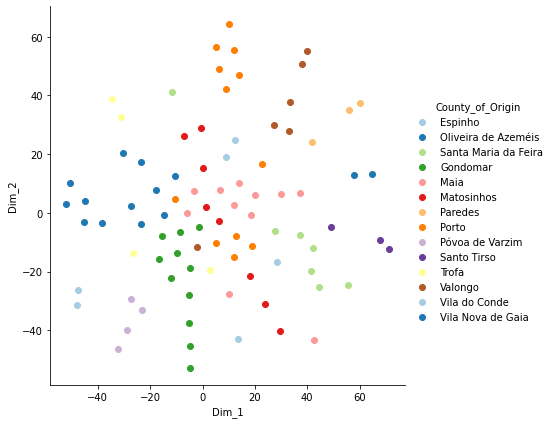

In [52]:
# Ploting the result of tsne

import seaborn as sns
from matplotlib import pyplot as plt

mycolors= sns.color_palette('Paired', 18)


sns.FacetGrid(tsne_df, hue="County_of_Origin", size=6, palette=mycolors).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### pre-covid Lisbon: visualizing main parish destinations by origin county

In [77]:
from sklearn.manifold import TSNE

counties = Pre_covid_Lisbon.iloc[:,0]
gender = Pre_covid_Lisbon.iloc[:,2]
age = Pre_covid_Lisbon.iloc[:,3]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(Churners_Lisbon_std)

In [78]:
import numpy as np
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, counties)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "County_of_Origin"))

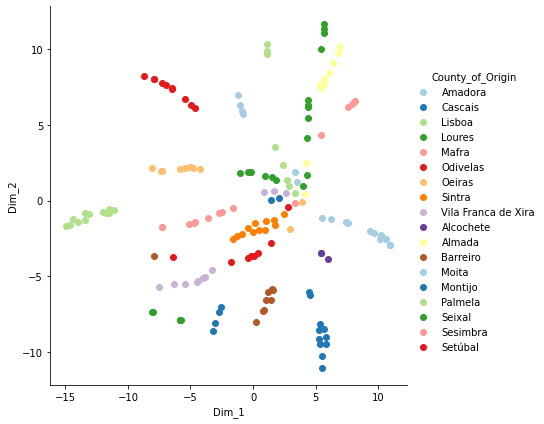

In [82]:
# Ploting the result of tsne

import seaborn as sns
from matplotlib import pyplot as plt

mycolors= sns.color_palette('Paired', 18)


sns.FacetGrid(tsne_df, hue="County_of_Origin", size=6, palette=mycolors).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### pre-covid Lisbon: visualizing main parish destinations by Gender

In [61]:
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, gender)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Gender"))

C:\Users\lucia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


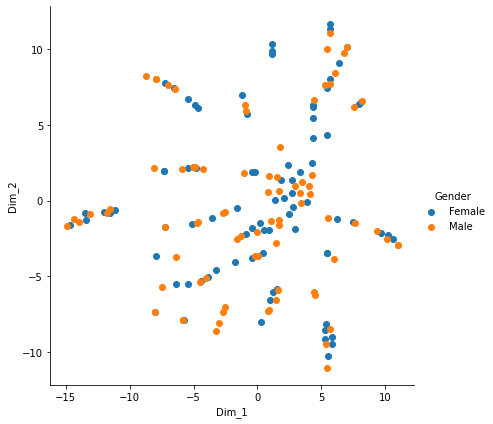

In [63]:
# Ploting the result of tsne
import seaborn as sns
from matplotlib import pyplot as plt
sns.FacetGrid(tsne_df, hue="Gender", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### pre-covid Lisbon: visualizing main parish destinations by age

In [65]:
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, age)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Age"))

C:\Users\lucia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


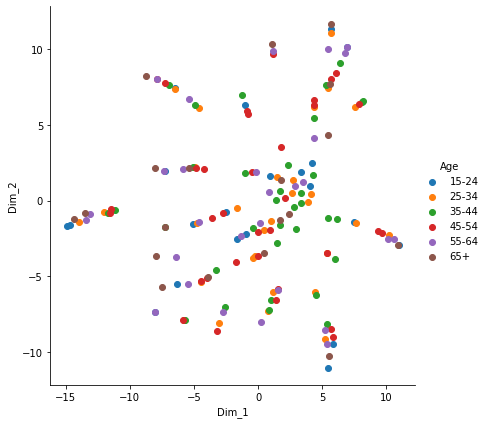

In [66]:
# Ploting the result of tsne
import seaborn as sns
from matplotlib import pyplot as plt
sns.FacetGrid(tsne_df, hue="Age", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### post covid Lisbon: visualizing main parish destinations by origin county

In [56]:
## Standardizing data
Pos_covid_Lisbon=Churners_Lisbon[Churners_Lisbon['Period'] ==1]
Pos_covid_Porto=Churners_Porto[Churners_Porto['Period'] == 1]

from sklearn.preprocessing import StandardScaler
Churners_Lisbon_std_2 = StandardScaler().fit_transform(Pos_covid_Lisbon.iloc[:,4:])
Churners_Porto_std_2 = StandardScaler().fit_transform(Pos_covid_Porto.iloc[:,4:])

In [57]:
from sklearn.manifold import TSNE

counties = Pos_covid_Lisbon.iloc[:,0]
gender = Pos_covid_Lisbon.iloc[:,2]
age = Pos_covid_Lisbon.iloc[:,3]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(Churners_Lisbon_std_2)

In [58]:
import numpy as np
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, counties)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "County_of_Origin"))

C:\Users\lucia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


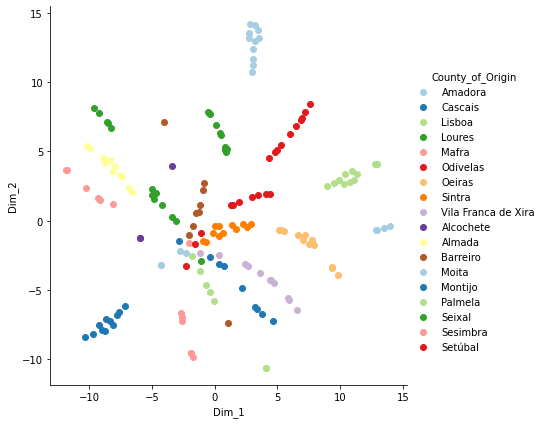

In [59]:
# Ploting the result of tsne

import seaborn as sns
from matplotlib import pyplot as plt

mycolors= sns.color_palette('Paired', 18)


sns.FacetGrid(tsne_df, hue="County_of_Origin", size=6, palette=mycolors).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### t-SNE visuals may allow infer that a PCA analysis could  be useful to adding interpretation for the visuals, once clearly separated groups are discovered in t-SNE visuals.

In [47]:
# save for FAMD analysis with R kernel
#save the final dataset
Churners_Lisbon.to_csv('Churner_FMDA_Lisbon')
Churners_Porto.to_csv('Churner_FMDA_Porto')

# 2- Dimension reduction analysis with FAMD (similar to PCA + also categorical data) 

## FAMD

#### Switch to R kernel - good FAMD library

## Analysis of the Lisbon origin bus travelers

In [1]:
Churner_FAMD_L <- read.csv(file = "Churner_FMDA_Lisbon", row.names=1)

library("FactoMineR")
library('reader')
library("factoextra")
library('missMDA')

head(Churner_FAMD_L)

Loading required package: NCmisc


Attaching package: 'reader'


The following objects are masked from 'package:NCmisc':

    cat.path, get.ext, rmv.ext


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



,County_of_Origin,Period,GenderDescription,AgeClassDescription,Ajuda,AlcÃ.ntara,Alfragide,Alvalade,Areeiro,Arroios,...,UniÃ.o.das.freguesias.de.Moscavide.e.Portela,UniÃ.o.das.freguesias.de.Pontinha.e.FamÃµes,UniÃ.o.das.freguesias.de.PÃ³voa.de.Santo.AdriÃ.o.e.Olival.Basto,UniÃ.o.das.freguesias.de.Ramada.e.CaneÃ.as,UniÃ.o.das.freguesias.de.SacavÃ.m.e.Prior.Velho,UniÃ.o.das.freguesias.de.Santa.Marinha.e.SÃ.o.Pedro.da.Afurada,UniÃ.o.das.freguesias.de.Santo.AntÃ³nio.dos.Cavaleiros.e.Frielas,UniÃ.o.das.freguesias.de.SÃ.o.Mamede.de.Infesta.e.Senhora.da.Hora,Venteira,Ã.guas.Livres
,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Amadora,0,Female,15-24,1.802298,8.802279,12.008980,18.06736,3.027981,3.875394,...,0.3302704,0.2179664,0,0,0.2025698,0,0,0,0.1488330,4.911488
1,Amadora,0,Female,25-34,4.901303,23.937572,32.658116,49.13372,8.234518,10.539034,...,0.8981618,0.5927540,0,0,0.5508835,0,0,0,0.4047475,13.356668
2,Amadora,0,Female,35-44,1.083118,5.289860,7.216975,10.85785,1.819710,2.328975,...,0.1984809,0.1309901,0,0,0.1217374,0,0,0,0.0894434,2.951632
3,Amadora,0,Female,45-54,4.029601,19.680245,26.849830,40.39523,6.769999,8.664654,...,0.7384226,0.4873319,0,0,0.4529082,0,0,0,0.3327627,10.981168
4,Amadora,0,Female,55-64,5.716404,27.918455,38.089249,57.30479,9.603941,12.291704,...,1.0475286,0.6913305,0,0,0.6424969,0,0,0,0.4720581,15.577918
5,Amadora,0,Male,15-24,7.045637,34.410325,46.946131,70.62986,11.837142,15.149890,...,1.2911101,0.8520854,0,0,0.7918966,0,0,0,0.5818256,19.200246


In [2]:
# analyze the two periods in separate to see if there is any difference:
Data_FAMD_1 <- subset(Churner_FAMD_L, Period == 0) #pre-covid
Data_FAMD_2 <- subset(Churner_FAMD_L, Period == 1) #pos-covid

### Pre-covid period

In [3]:
Data_FAMD_1 =  subset(Data_FAMD_1, select = -Period) #remove Period column

In [162]:
#check for irrelavant columns in pre-covid period
colSums(Data_FAMD_1[,-c(1,2,3)]) #none

In [4]:
res_FAMD_L= FAMD(Data_FAMD_1, ncp = 10, sup.var = 2:3, ind.sup = NULL, graph = TRUE)

Warning message:
"ggrepel: 152 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 152 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


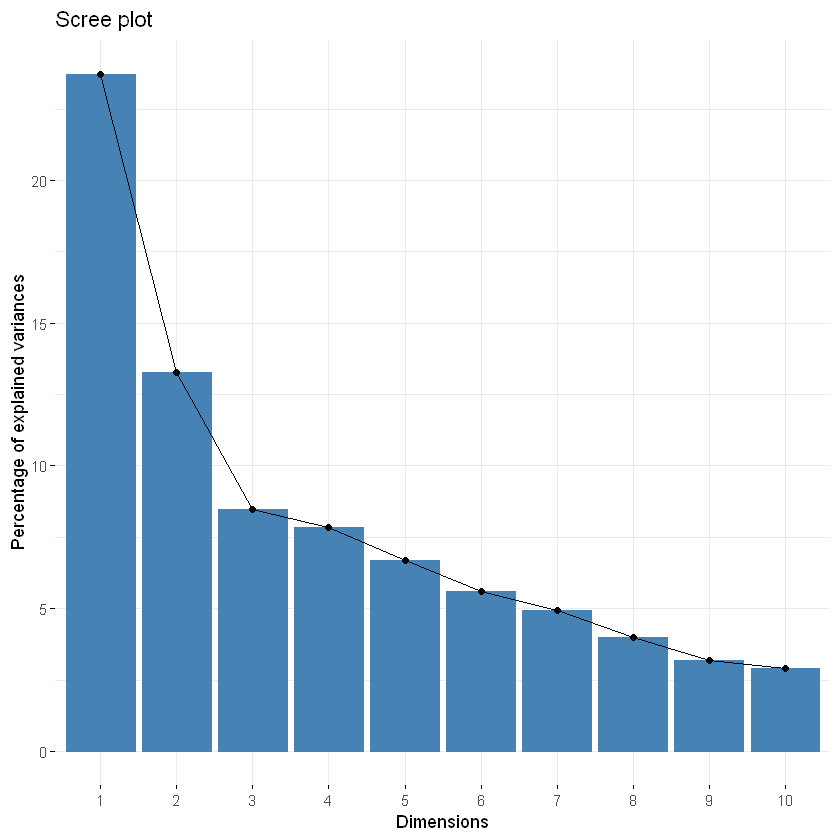

In [5]:
fviz_screeplot(res_FAMD_L)

In [100]:
res_FAMD_L$eig # 10 components explain 80 % of the variance in the dataset

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,18.502875,23.721635,23.72163
comp 2,10.355651,13.276476,36.99811
comp 3,6.610191,8.474604,45.47272
comp 4,6.107390,7.829987,53.30270
comp 5,5.230999,6.706408,60.00911
comp 6,4.382154,5.618146,65.62726
comp 7,3.841219,4.924639,70.55190
comp 8,3.125579,4.007153,74.55905
comp 9,2.493791,3.197168,77.75622
comp 10,2.258152,2.895066,80.65128


Warning message:
"ggrepel: 157 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 157 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


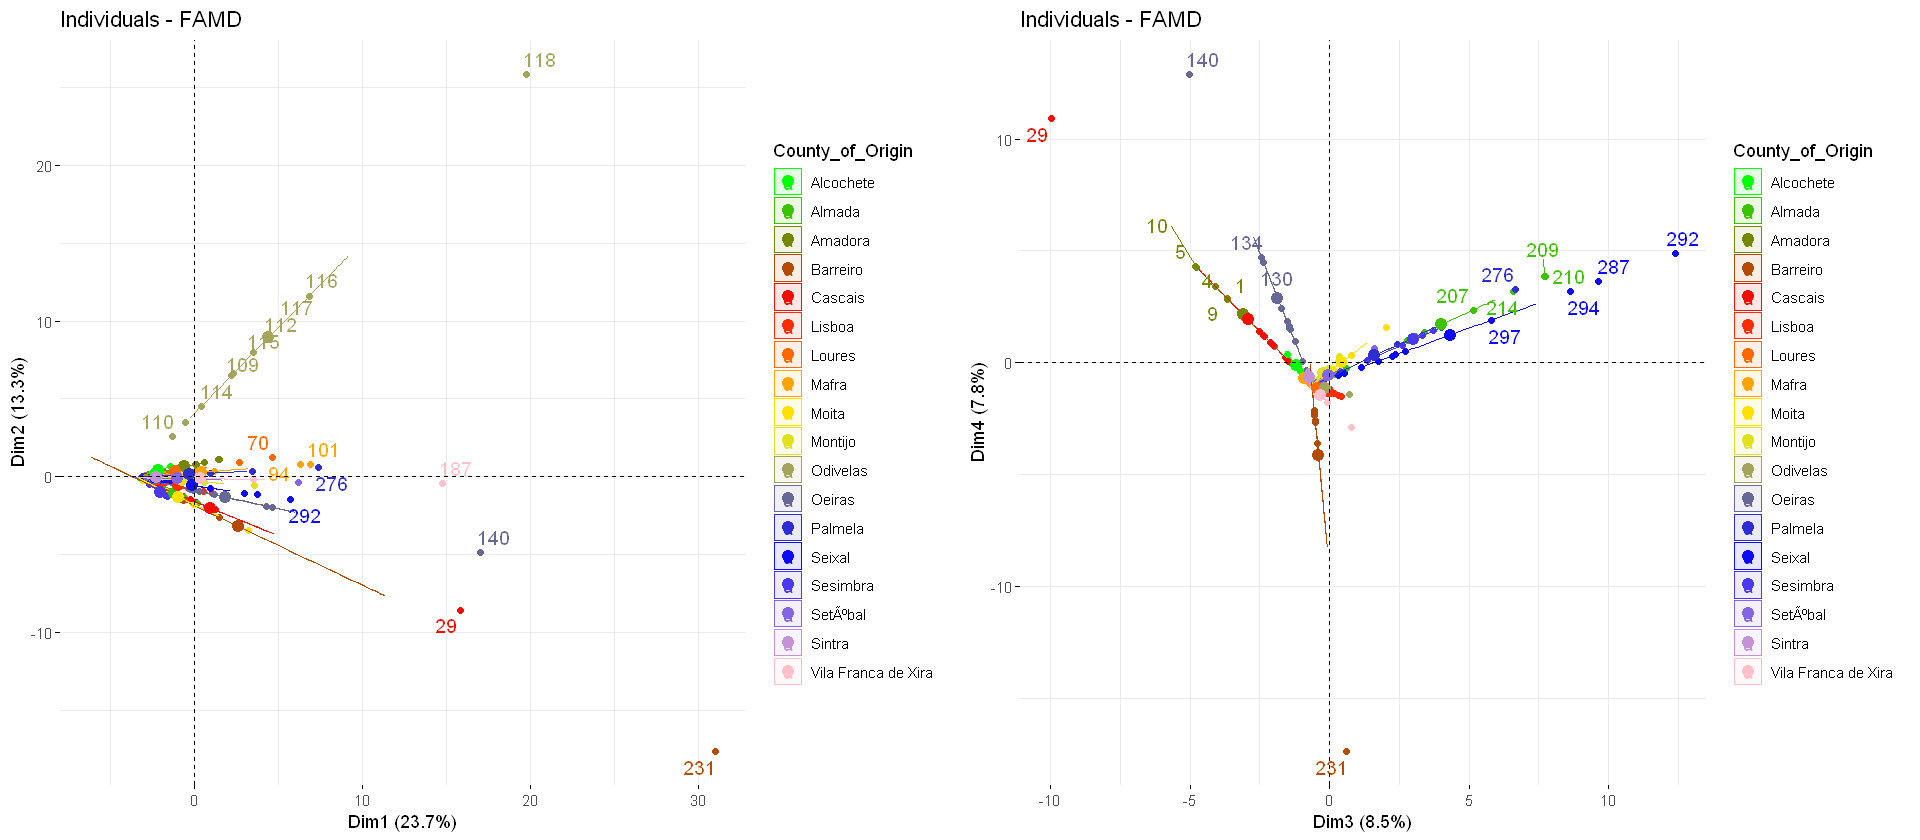

In [100]:
library(gridExtra)

library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(RColorBrewer)
# Define the number of colors you want
nb.cols <- 18
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_L, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_mfa_ind(res_FAMD_L, axes=c(3,4),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

gridExtra::grid.arrange(a,b, ncol=2)

### Apparently PCA analysis returned the strongest correlations between the different origin groups and their main parish destinations. In both similar star-like shaped plots above, the less churn groups are far from the center of the "star" while the main churn groups for each higher correlated OD pairs are in the direction of the center of the "star".

### This PCA analysis allow then to infer which are the most relevant destinations from each origin county besides which are the intensive users as well as the main churner groups from those OD pairs.

### Moreover, from this preliminary analysis, plots for the main 4 dimeniosn show that there seems to have some outlier groups that indeed are not churners so they will be removed from PCA analysis.
#### Individuals: 118,187, 140, 29, 231

In [101]:
which(rownames(Data_FAMD_1) %in% c('118', '187', '140', '29', '231'))

[1]  18  65  76  99 118

In [13]:
Data_FAMD_1a=Data_FAMD_1[-c(18,65,76,99,118),] # remove individual outliers

In [14]:
res_FAMD_L_2= FAMD(Data_FAMD_1a, ncp = 10, sup.var = 2:3, ind.sup = NULL, graph = TRUE)

Warning message:
"ggrepel: 118 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 118 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


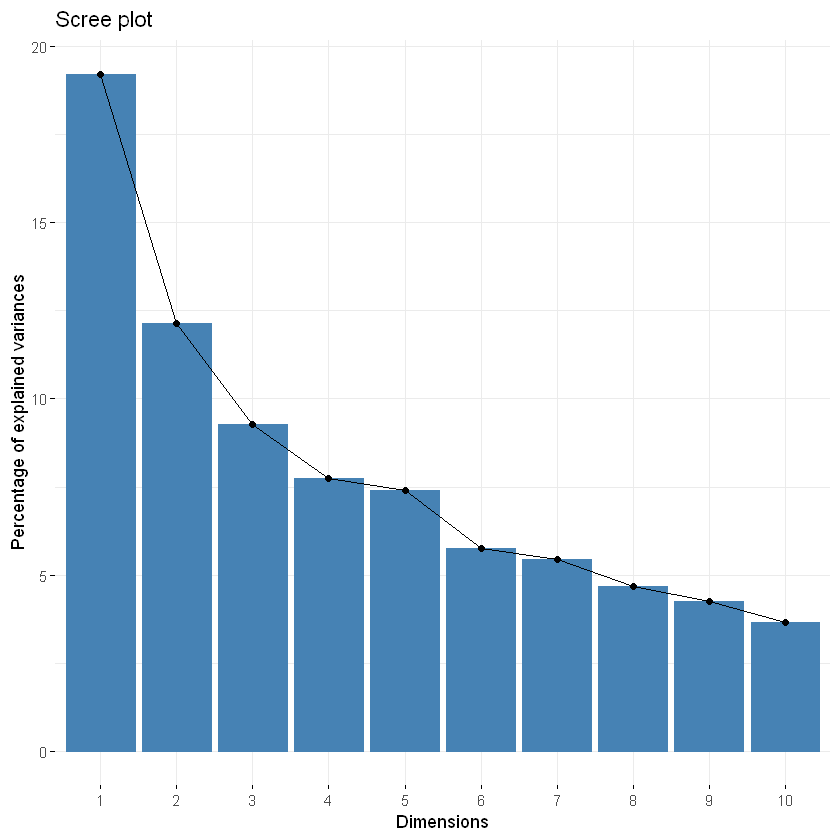

In [104]:
library(repr)
options(repr.plot.width=7, repr.plot.height=7)
fviz_screeplot(res_FAMD_L_2)

In [105]:
res_FAMD_L_2$eig #again the 10 components explain 80% of the dataset variance

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,14.980802,19.206156,19.20616
comp 2,9.466374,12.136377,31.34253
comp 3,7.239269,9.281114,40.62365
comp 4,6.040557,7.744304,48.36795
comp 5,5.775726,7.404778,55.77273
comp 6,4.492289,5.759345,61.53207
comp 7,4.256570,5.457141,66.98921
comp 8,3.660228,4.692601,71.68182
comp 9,3.307868,4.240856,75.92267
comp 10,2.862338,3.669664,79.59234


Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"ggrepel: 146 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 59 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 148 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 146 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


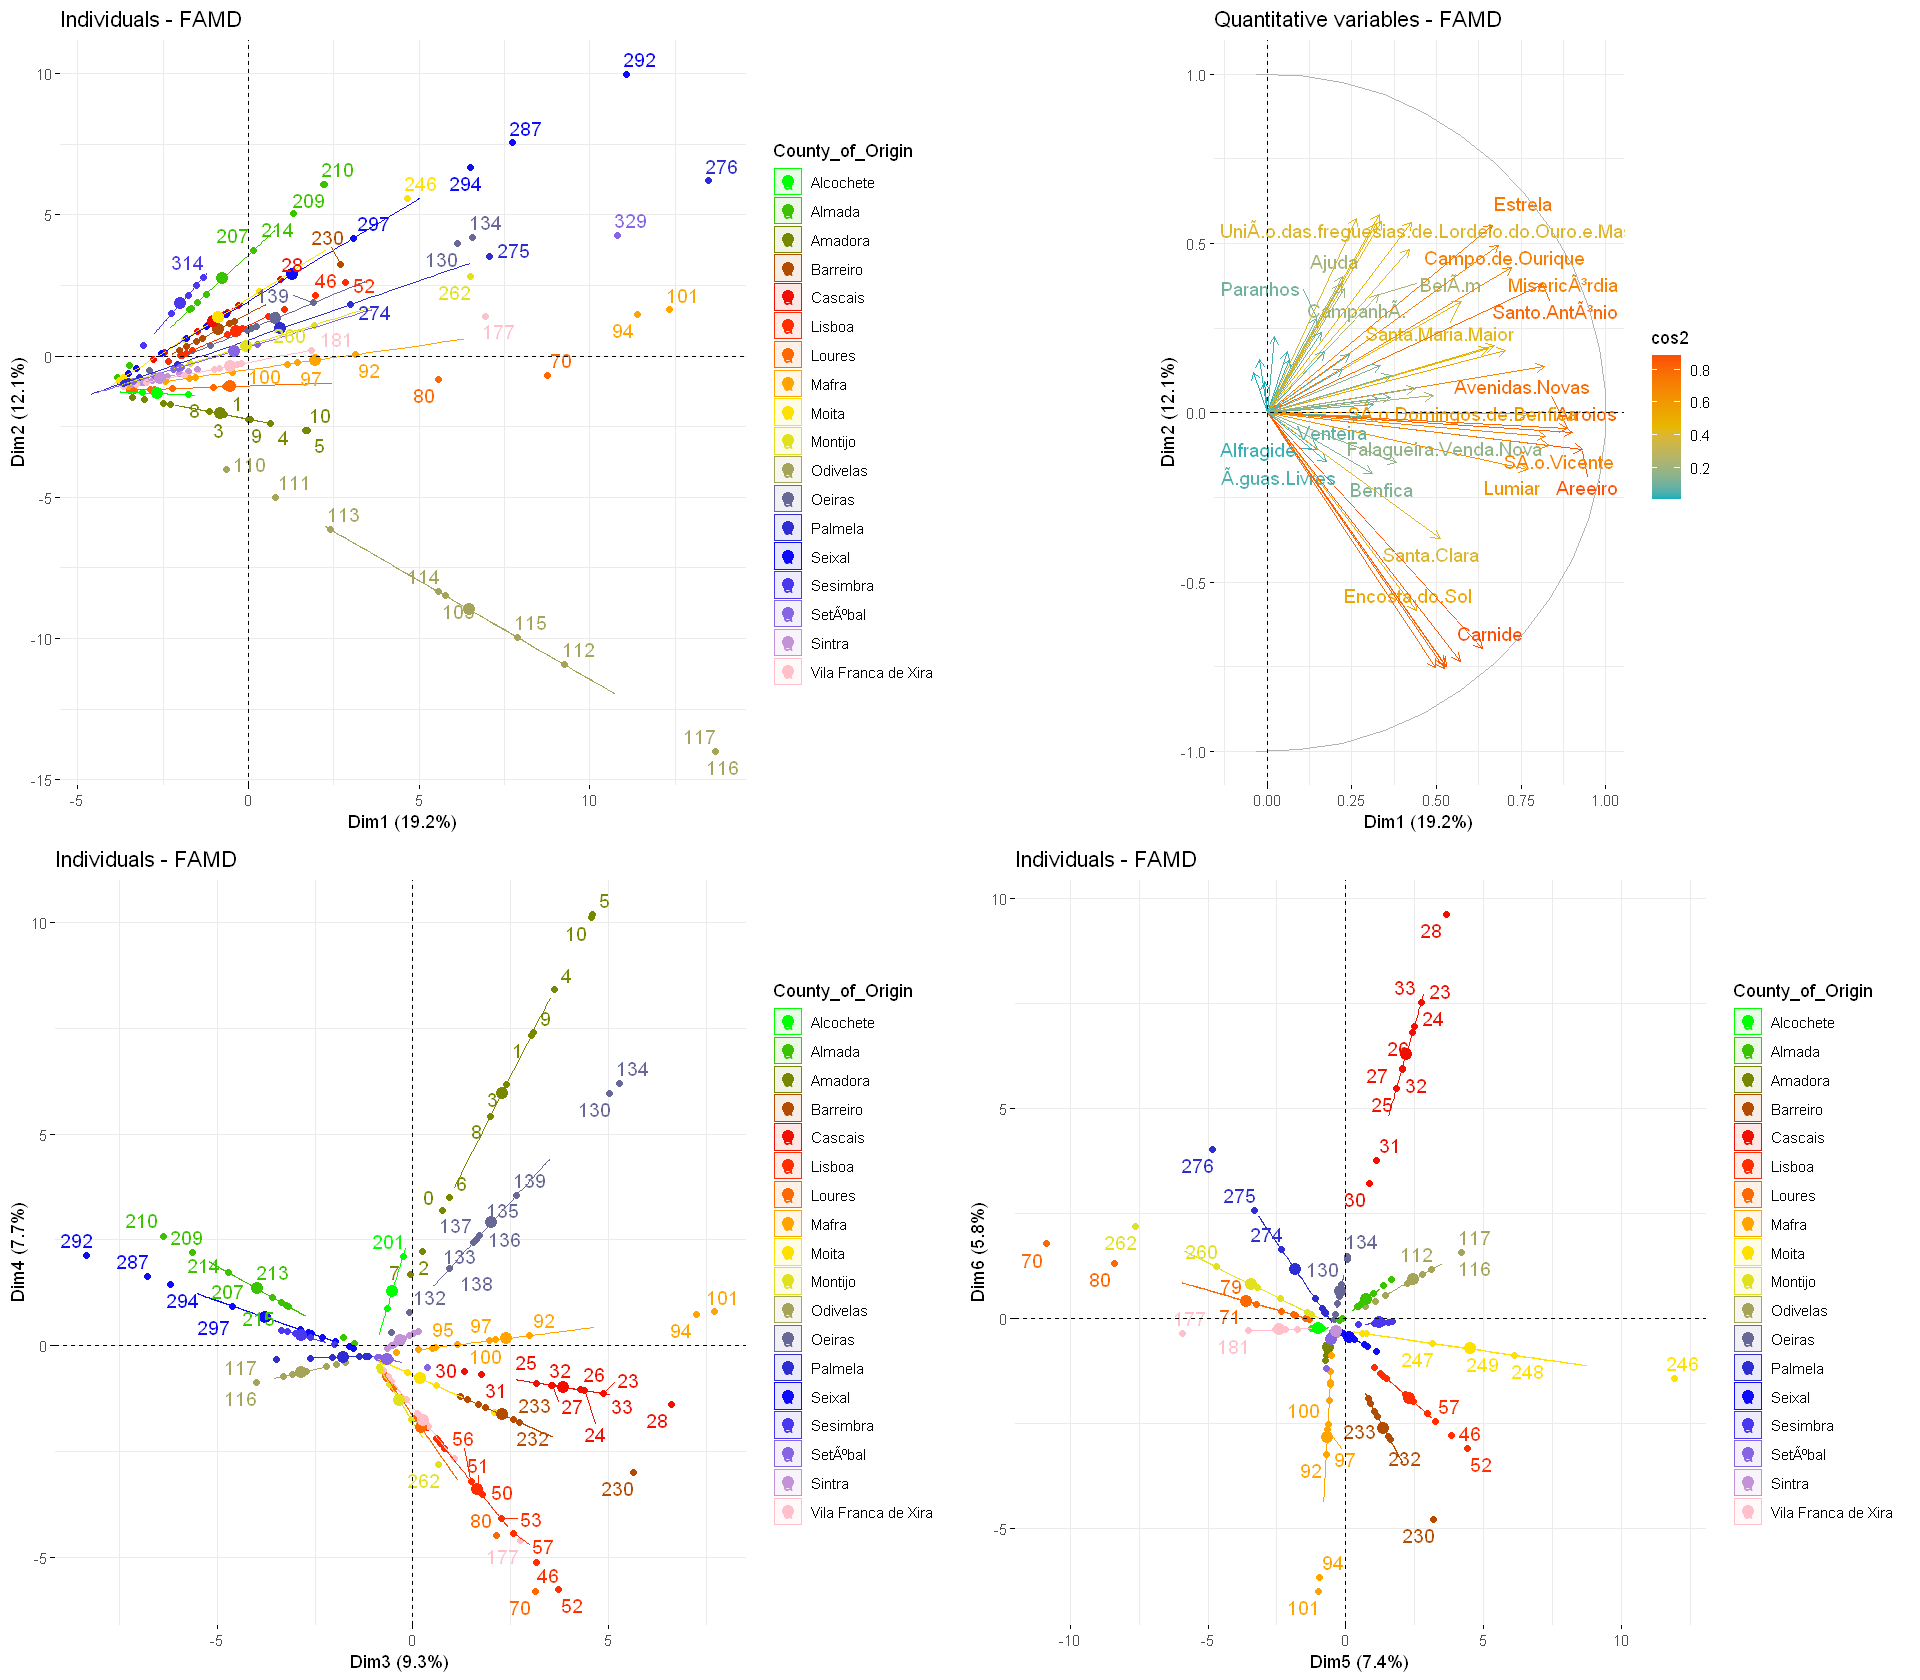

In [106]:
library(RColorBrewer)
library(repr)
options(repr.plot.width=16, repr.plot.height=14)

library(gridExtra)


# Define the number of colors you want
nb.cols <- 18
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_L_2, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_famd_var(res_FAMD_L_2, "quanti.var", col.var = "cos2", axes = c(1,2),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE) + xlim(-0.1,1) + ylim(-1,1)

c=fviz_mfa_ind(res_FAMD_L_2, axes=c(3,4),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )
d=fviz_mfa_ind(res_FAMD_L_2, axes=c(5,6),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

gridExtra::grid.arrange(a,b,c, d, ncol=2)


#### First, no evident outliers are now observed.
#### Below follows a more detailed analysis of the main churner groups and how to analyze such PCA results.

### Churners analysis

Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"ggrepel: 146 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 59 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 146 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 145 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


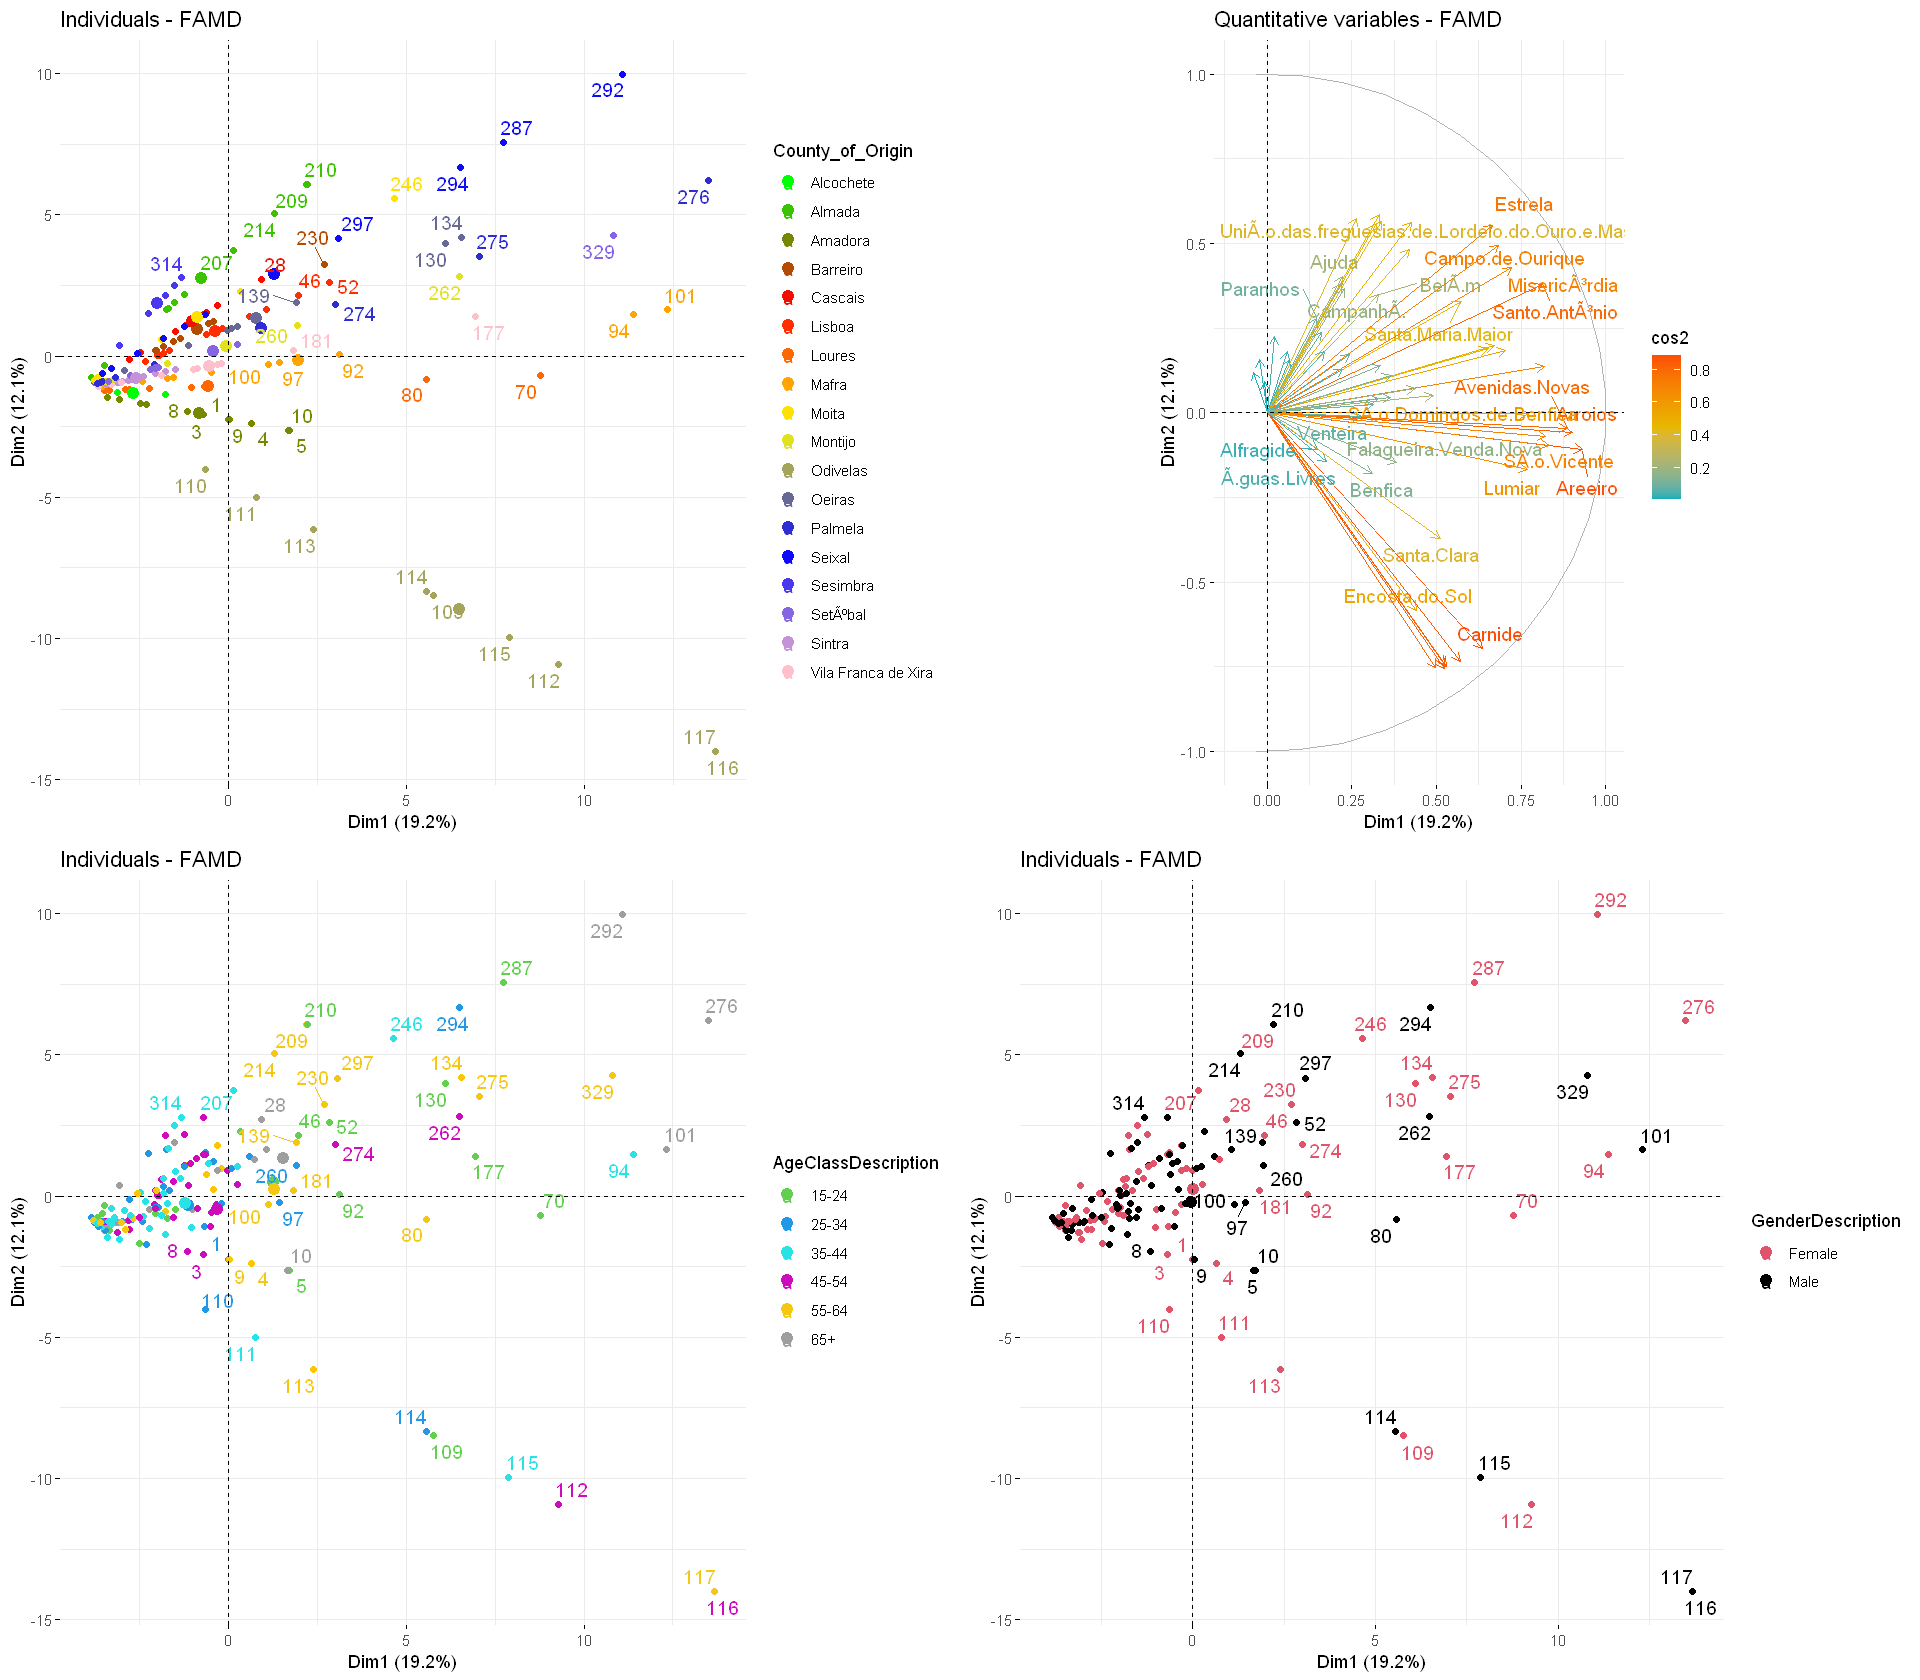

In [129]:
library(RColorBrewer)
library(repr)
options(repr.plot.width=16, repr.plot.height=14)

library(gridExtra)
# Define the number of colors you want
nb.cols <- 18
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_L_2, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             #addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_famd_var(res_FAMD_L_2, "quanti.var", col.var = "cos2", axes = c(1,2),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE) + xlim(-0.1,1) + ylim(-1,1)

c=fviz_mfa_ind(res_FAMD_L_2, axes=c(1,2),
             habillage = "AgeClassDescription", # color by groups 
             palette = c(3:8), 
             repel = TRUE # Avoid text overlapping
             ) 

d=fviz_mfa_ind(res_FAMD_L_2, axes=c(1,2),
             habillage = "GenderDescription", # color by groups 
             palette = c(2,1), 
             repel = TRUE # Avoid text overlapping
             )
gridExtra::grid.arrange(a,b,c,d, ncol=2)

### Quick overview analysis as example

#### The Odivelas bus travelers (that are shown majorly on the 2nd quadrant of the 1st and 2nd PCA dimensions in the top left plot above) are highly correlated to parish destinations such as Carnide, Odivelas and Loures (also on the 2nd quadrant (exactly on the same direction as on the Odivelas travelers, see enlarged image below). This indicates that in these two dimensions most bus travelers from Odivelas head to those destinations and the main churners in this group are # 110, ##111 females from 25-44 years old (see detailed table below).

####  Most of the Seixal travelers are mainly probably going to Estrela or Campo de Ourique, one of the main churners groups are 55-64 years old males.


### The important outcome  from this analysis is that simply by changing the axis on the plots and combining with other views it is very easy to check the main churn groups combined by their origin county and which their main parish destinations are.

Warning message:
"ggrepel: 43 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


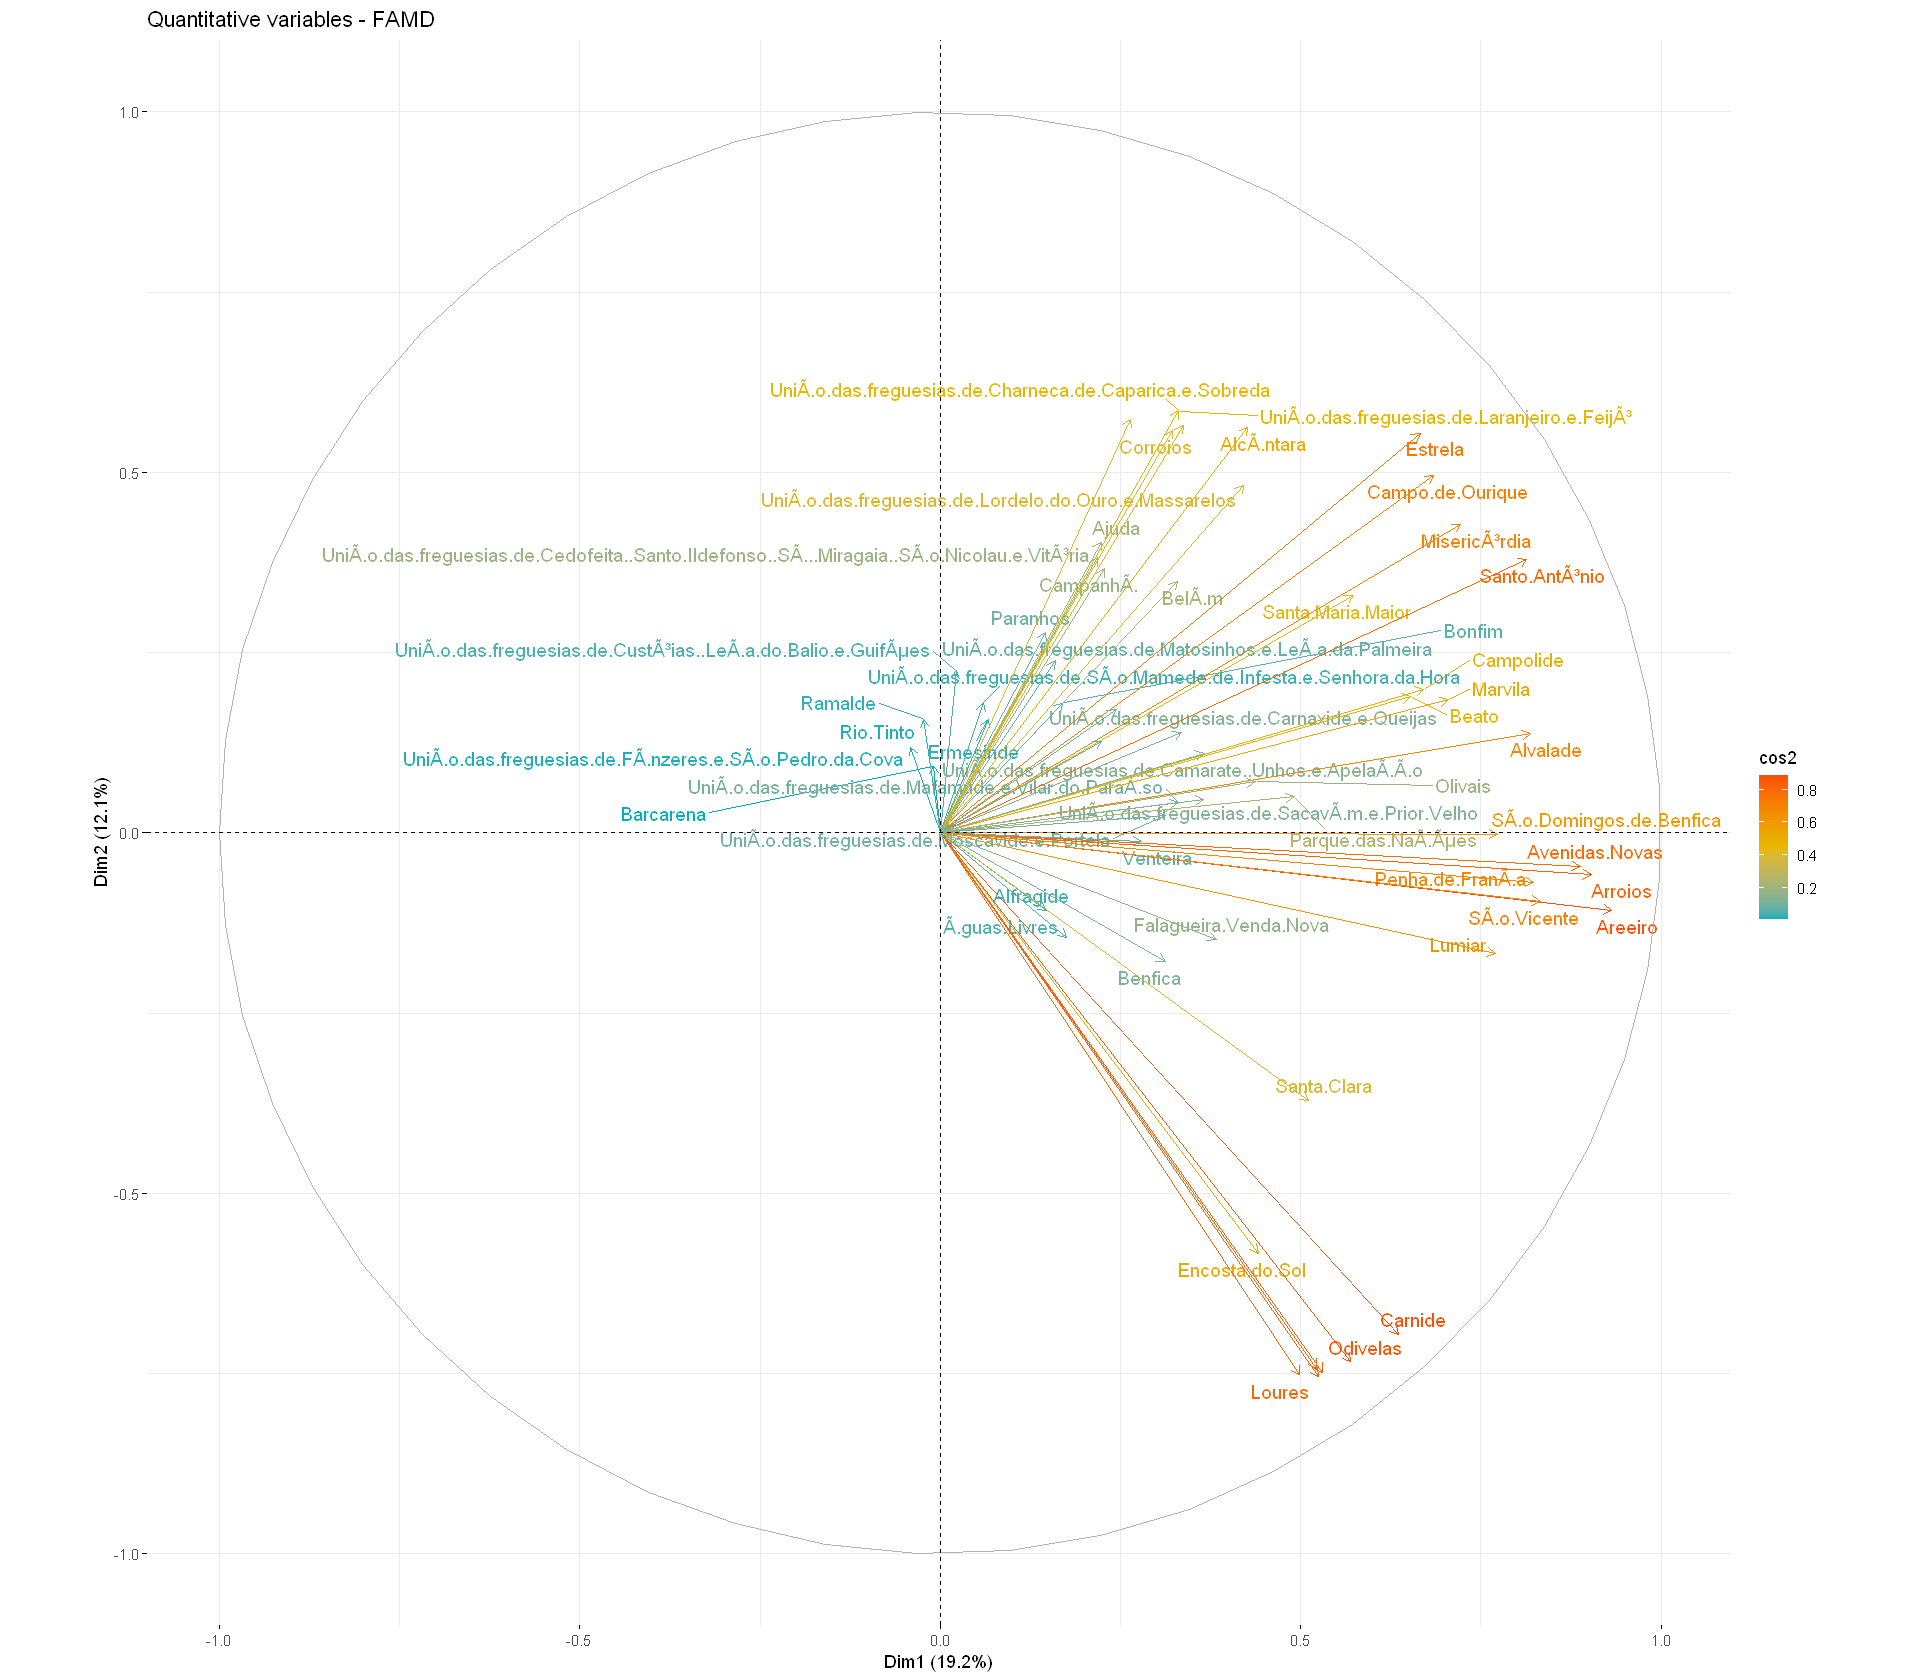

In [110]:
#enlarged picture of the varibales on dimensions (1,2)
library(repr)
options(repr.plot.width=16, repr.plot.height=14)

fviz_famd_var(res_FAMD_L_2, "quanti.var", col.var = "cos2", axes = c(1,2),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

In [28]:
#chuners from Odivelas county heading to Odivelas parish
subset(Data_FAMD_1, County_of_Origin == "Odivelas")[, c(2,3,19,26:29)] 
# indeed indexes 110 and 111 are the lowest values in this OD pair, the biggest churners
# this table also shows individuals 65+ males that are highly intensive bus users heading to Lumiar and/or Carnide 
# from the analysis because indeed they are heavy outliers for almost all the destinations (so, not churners at all)
# as example index 118 shows that ca. 400 more male seniors than the ones living in Odivelas travel from Odivelas to Lumiar,
# so maybe Odivelas has very good bus line for connecting seniors to Lumiar, the same happens to Carnide
# where ca. 570 more seniors travel than the same residents in that segment of the population

,GenderDescription,AgeClassDescription,Carnide,Lumiar,Marvila,MisericÃ³rdia,Odivelas
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
109,Female,15-24,130.89678,93.21282,13.736376,13.354566,7.342007
110,Female,25-34,39.71360,28.28043,4.167566,4.051726,2.227538
111,Female,35-44,59.94339,42.68625,6.290490,6.115643,3.362228
112,Female,45-54,180.60437,128.61006,18.952715,18.425915,10.130108
113,Female,55-64,83.04270,59.13548,8.714543,8.472318,4.657869
114,Male,25-34,127.92650,91.09766,13.424673,13.051528,7.175404
115,Male,35-44,160.98390,114.63814,16.893734,16.424164,9.029595
116,Male,45-54,243.21981,173.19910,25.523612,24.814171,13.642212
117,Male,55-64,243.15611,173.15373,25.516927,24.807671,13.638638


Warning message:
"ggrepel: 130 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 57 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


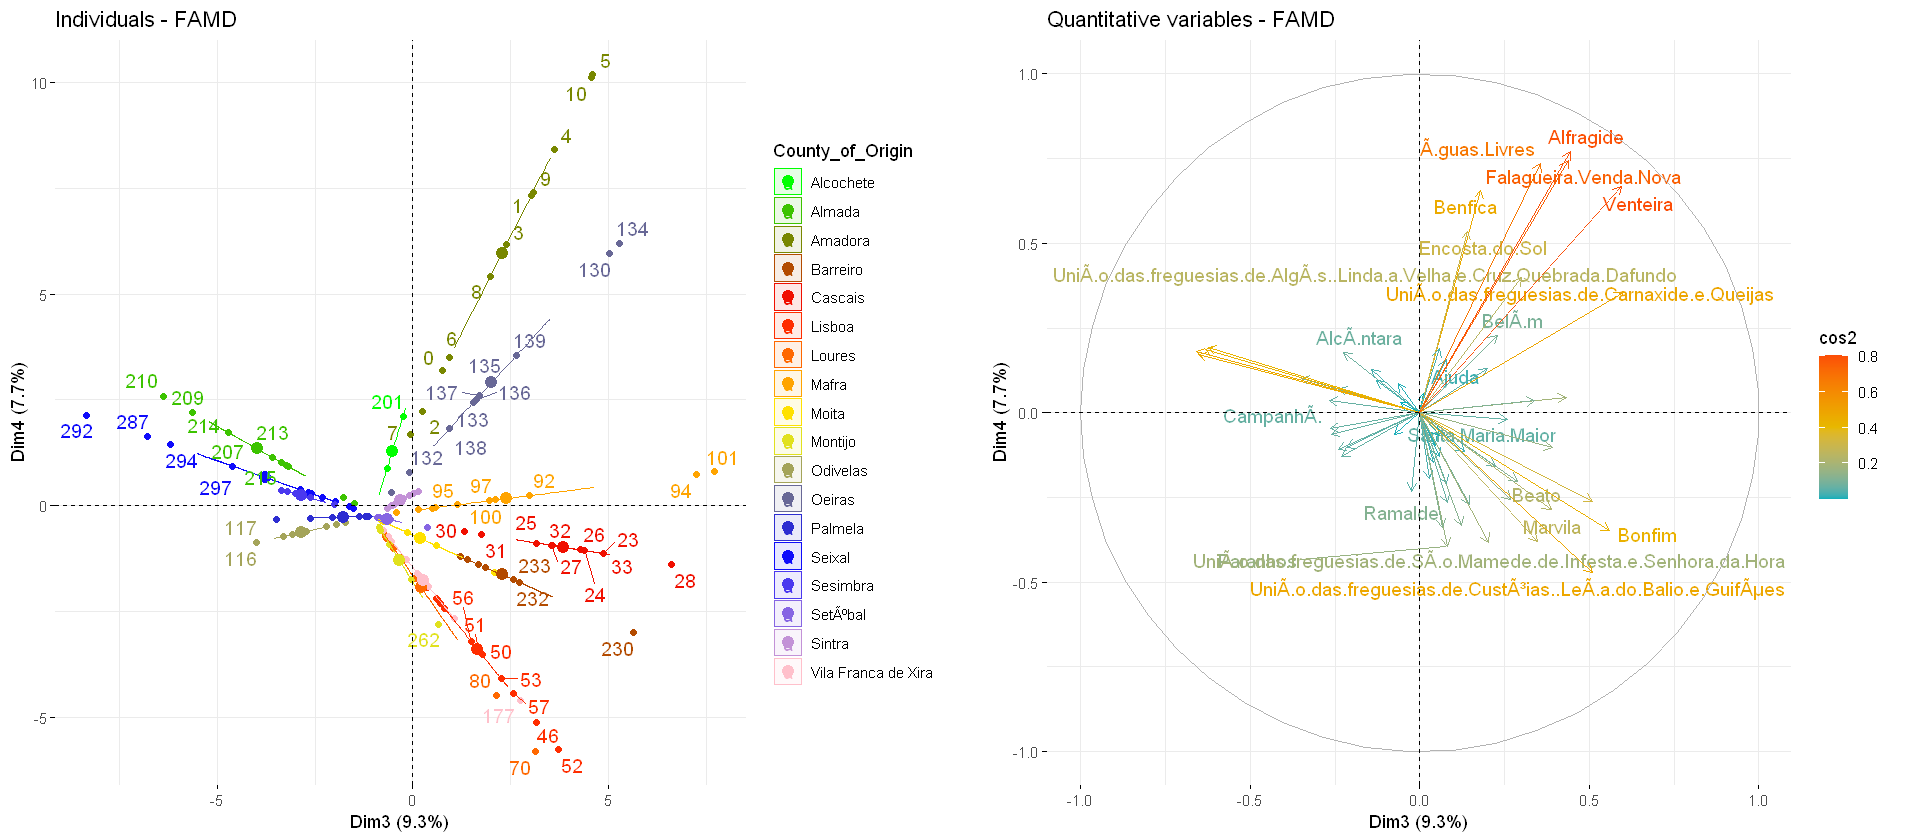

In [128]:
library(RColorBrewer)
library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(gridExtra)


# Define the number of colors you want
nb.cols <- 18
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_L_2, axes=c(3,4),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_famd_var(res_FAMD_L_2, "quanti.var", col.var = "cos2", axes = c(3,4),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

gridExtra::grid.arrange(a,b, ncol=2)

#### E.g. from these plots above one can see the main groups from Lisbon heading to Porto destinations (2nd quadrant) or Amadora traveleres going to Alfragide (1st quadrant), or yet Oeiras travelers going to Venteira (also 1st quadrant). And augmented analysis of the images at the center of the left "star" would allow infer main churn groups from each OD pair.

Warning message:
"ggrepel: 141 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 57 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


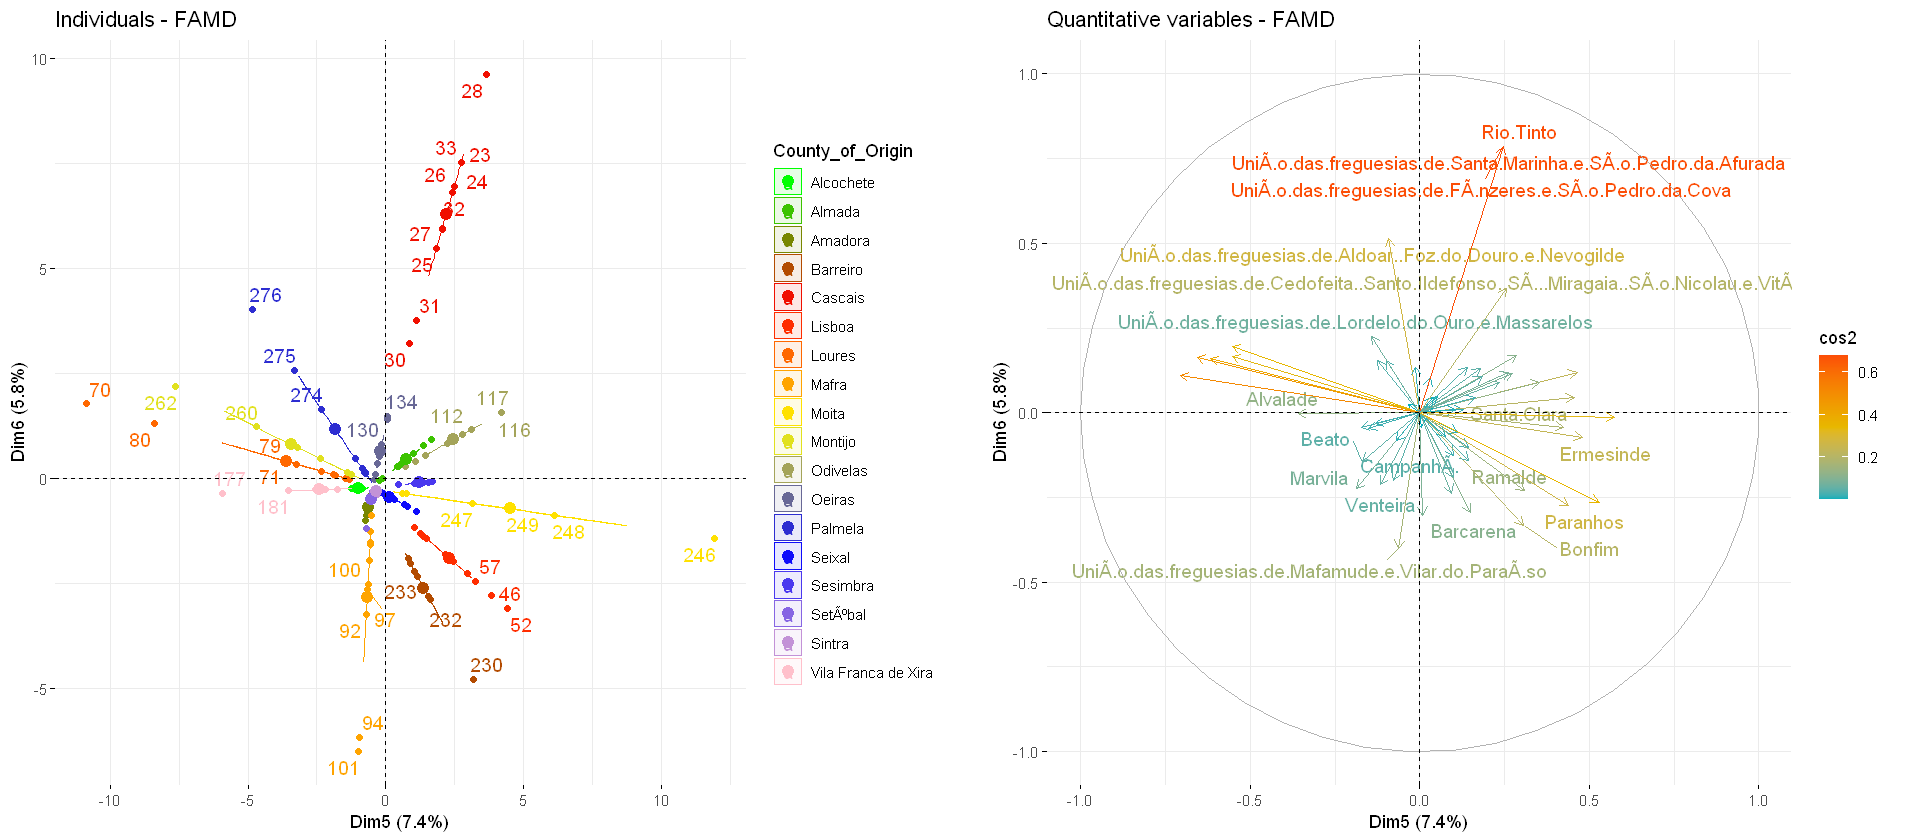

In [130]:
library(RColorBrewer)
library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(gridExtra)


# Define the number of colors you want
nb.cols <- 18
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_L_2, axes=c(5,6),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_famd_var(res_FAMD_L_2, "quanti.var", col.var = "cos2", axes = c(5,6),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

gridExtra::grid.arrange(a,b, ncol=2)

In [163]:
Data_FAMD_1a

,County_of_Origin,GenderDescription,AgeClassDescription,Ajuda,AlcÃ.ntara,Alfragide,Alvalade,Areeiro,Arroios,Avenidas.Novas,...,UniÃ.o.das.freguesias.de.Moscavide.e.Portela,UniÃ.o.das.freguesias.de.Pontinha.e.FamÃµes,UniÃ.o.das.freguesias.de.PÃ³voa.de.Santo.AdriÃ.o.e.Olival.Basto,UniÃ.o.das.freguesias.de.Ramada.e.CaneÃ.as,UniÃ.o.das.freguesias.de.SacavÃ.m.e.Prior.Velho,UniÃ.o.das.freguesias.de.Santa.Marinha.e.SÃ.o.Pedro.da.Afurada,UniÃ.o.das.freguesias.de.Santo.AntÃ³nio.dos.Cavaleiros.e.Frielas,UniÃ.o.das.freguesias.de.SÃ.o.Mamede.de.Infesta.e.Senhora.da.Hora,Venteira,Ã.guas.Livres
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Amadora,Female,15-24,1.8022980,8.802279,12.0089803,18.067358,3.027981,3.875394,6.394988,...,0.3302704,0.21796636,0,0,0.20256984,0.00000000,0,0.00000000,0.14883298,4.91148849
1,Amadora,Female,25-34,4.9013035,23.937572,32.6581157,49.133720,8.234518,10.539034,17.391007,...,0.8981618,0.59275395,0,0,0.55088352,0.00000000,0,0.00000000,0.40474751,13.35666769
2,Amadora,Female,35-44,1.0831178,5.289860,7.2169753,10.857848,1.819710,2.328975,3.843163,...,0.1984809,0.13099012,0,0,0.12173736,0.00000000,0,0.00000000,0.08944340,2.95163205
3,Amadora,Female,45-54,4.0296006,19.680245,26.8498296,40.395227,6.769999,8.664654,14.297995,...,0.7384226,0.48733193,0,0,0.45290821,0.00000000,0,0.00000000,0.33276266,10.98116789
4,Amadora,Female,55-64,5.7164035,27.918455,38.0892488,57.304791,9.603941,12.291704,20.283179,...,1.0475286,0.69133054,0,0,0.64249694,0.00000000,0,0.00000000,0.47205811,15.57791773
5,Amadora,Male,15-24,7.0456371,34.410325,46.9461306,70.629857,11.837142,15.149890,24.999620,...,1.2911101,0.85208543,0,0,0.79189657,0.00000000,0,0.00000000,0.58182565,19.20024632
6,Amadora,Male,25-34,2.0444630,9.984993,13.6225618,20.494971,3.434835,4.396109,7.254248,...,0.3746470,0.24725332,0,0,0.22978805,0.00000000,0,0.00000000,0.16883086,5.57141854
7,Amadora,Male,35-44,0.6705724,3.275022,4.4681239,6.722236,1.126607,1.441899,2.379353,...,0.1228821,0.08109770,0,0,0.07536919,0.00000000,0,0.00000000,0.05537558,1.82739405
8,Amadora,Male,45-54,3.4622366,16.909285,23.0693984,34.707617,5.816789,7.444679,12.284850,...,0.6344534,0.41871605,0,0,0.38913915,0.00000000,0,0.00000000,0.28590999,9.43502961


#### This final example shows, e.g., bus travelers from Cascais heading to some Porto destinations. To illustrate better, for instance, the main churn groups from Cascais heading to those northen destinations are #30 #31 25-44 years old males; on the other hand senior females travel a lot from Cascais to those northen destinations.

# Post-covid Lisbon analysis

In [164]:
Data_FAMD_2 =  subset(Data_FAMD_2, select = -Period) #remove Period column

In [166]:
#check for irrelavant columns in pre-covid period
colSums(Data_FAMD_2[,-c(1,2,3)]) #none

In [168]:
res_FAMD_L_Post= FAMD(Data_FAMD_2, ncp = 10, sup.var = 2:3, ind.sup = NULL, graph = TRUE)

Warning message:
"ggrepel: 160 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 160 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


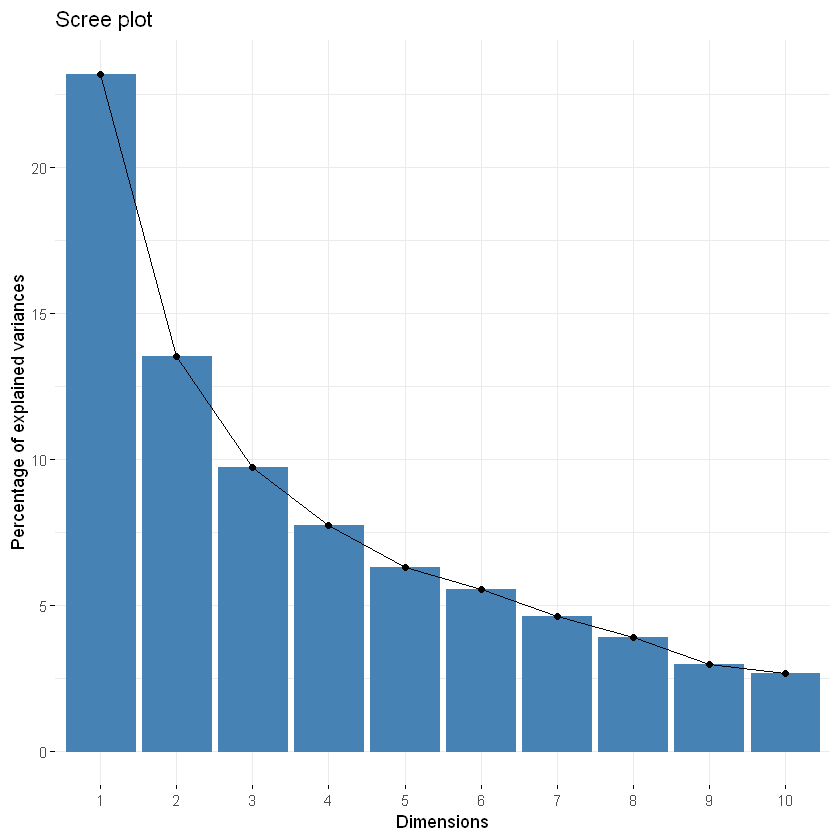

In [169]:
library(repr)
options(repr.plot.width=7, repr.plot.height=7)
fviz_screeplot(res_FAMD_L_Post)

Warning message:
"ggrepel: 166 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 162 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


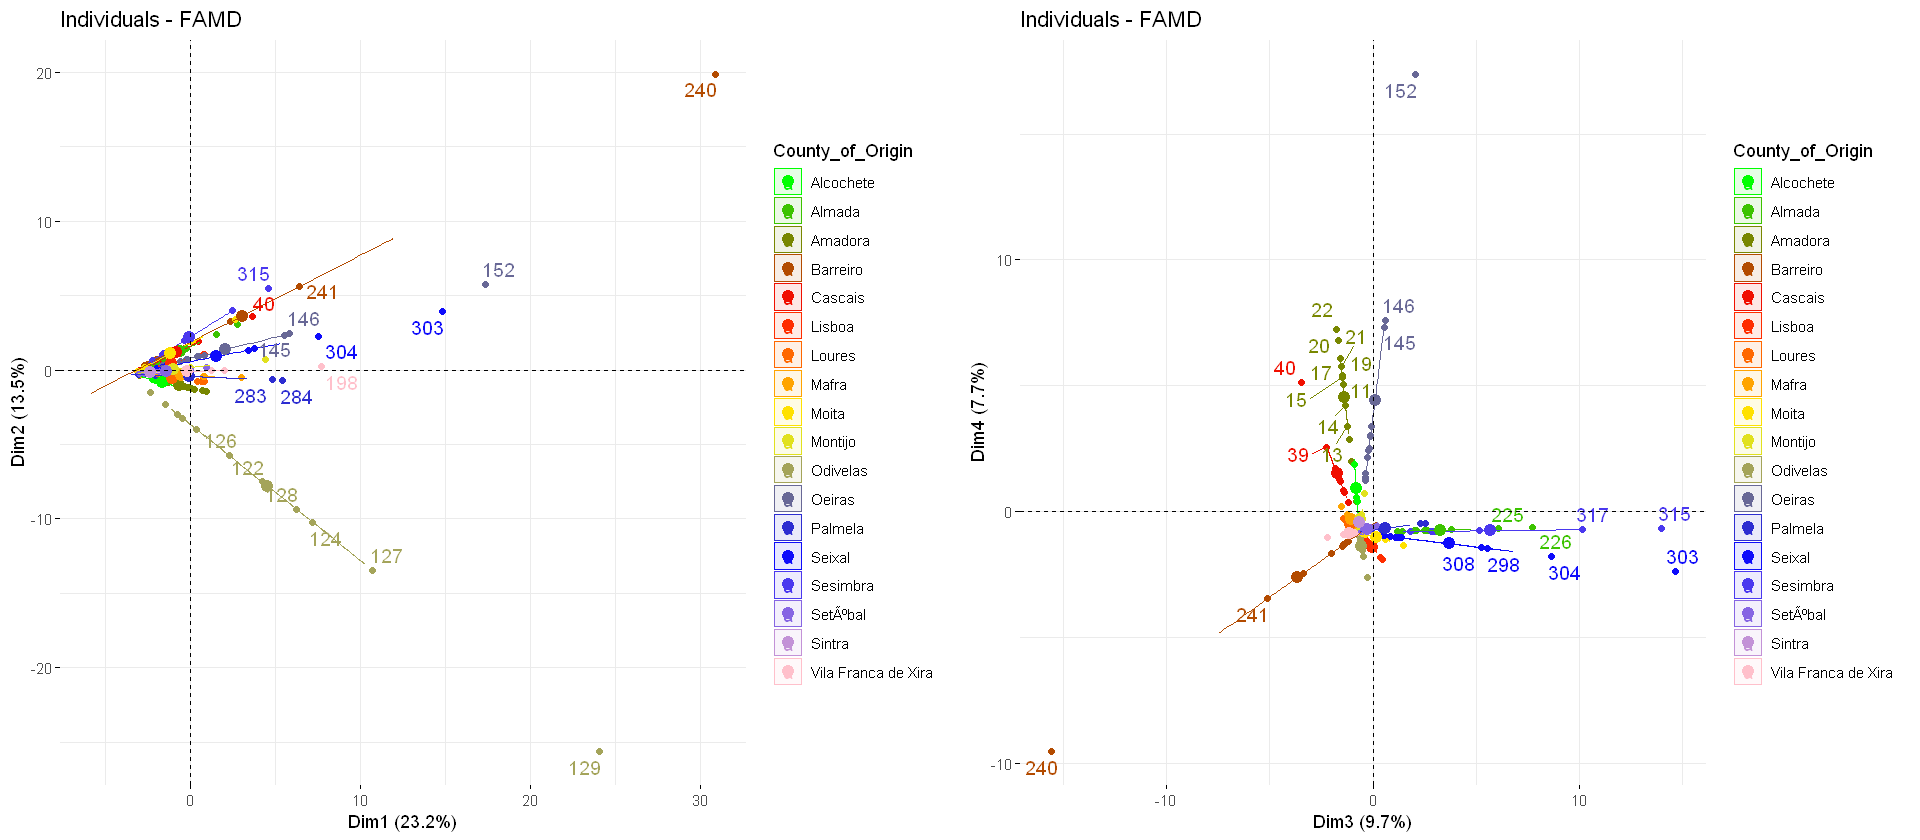

In [171]:
library(gridExtra)

library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(RColorBrewer)
# Define the number of colors you want
nb.cols <- 18
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_L_Post, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_mfa_ind(res_FAMD_L_Post, axes=c(3,4),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

gridExtra::grid.arrange(a,b, ncol=2)

#### Preliminary analysis show the pattern has not changed too much. Some individual groups will be removed for an improved analysis.
##### Individual groups 240,129,303,152

In [172]:
which(rownames(Data_FAMD_2) %in% c('240', '297', '303', '152'))

[1]  77 119 151

In [173]:
Data_FAMD_2a=Data_FAMD_2[-c(77,119,151),] # remove individual outliers

In [174]:
res_FAMD_L_Post_1= FAMD(Data_FAMD_2a, ncp = 10, sup.var = 2:3, ind.sup = NULL, graph = TRUE)

Warning message:
"ggrepel: 144 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 144 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


Warning message:
"ggrepel: 157 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 143 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


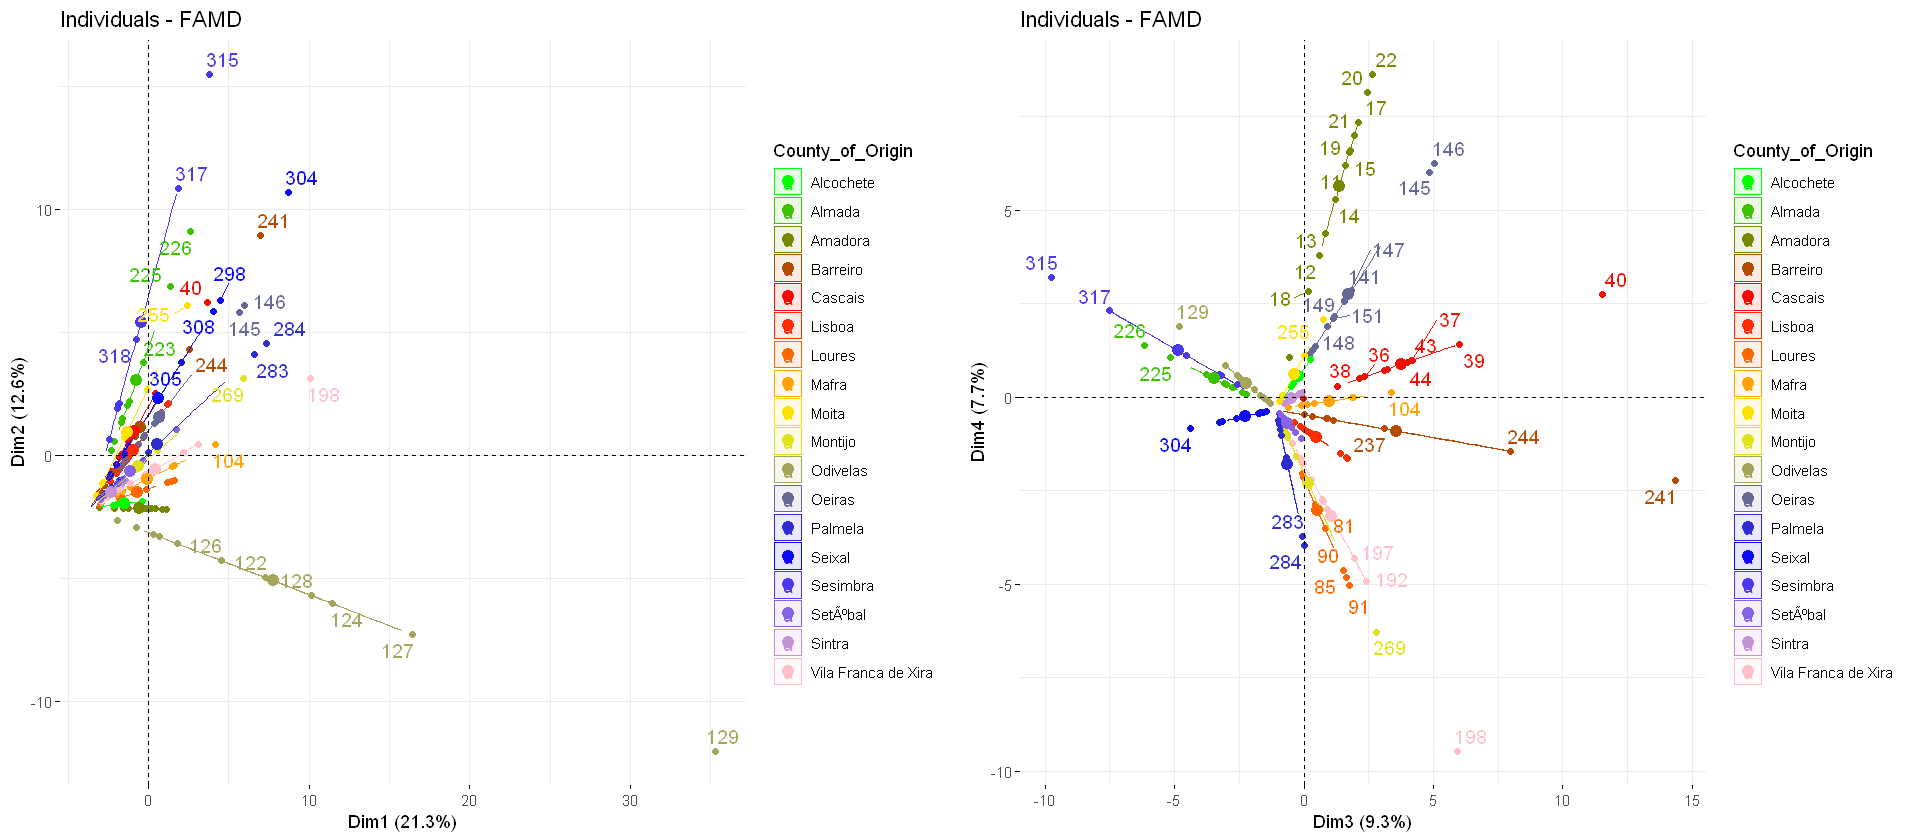

In [175]:
library(gridExtra)

library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(RColorBrewer)
# Define the number of colors you want
nb.cols <- 18
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_L_Post_1, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_mfa_ind(res_FAMD_L_Post_1, axes=c(3,4),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

gridExtra::grid.arrange(a,b, ncol=2)

Warning message:
"ggrepel: 38 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


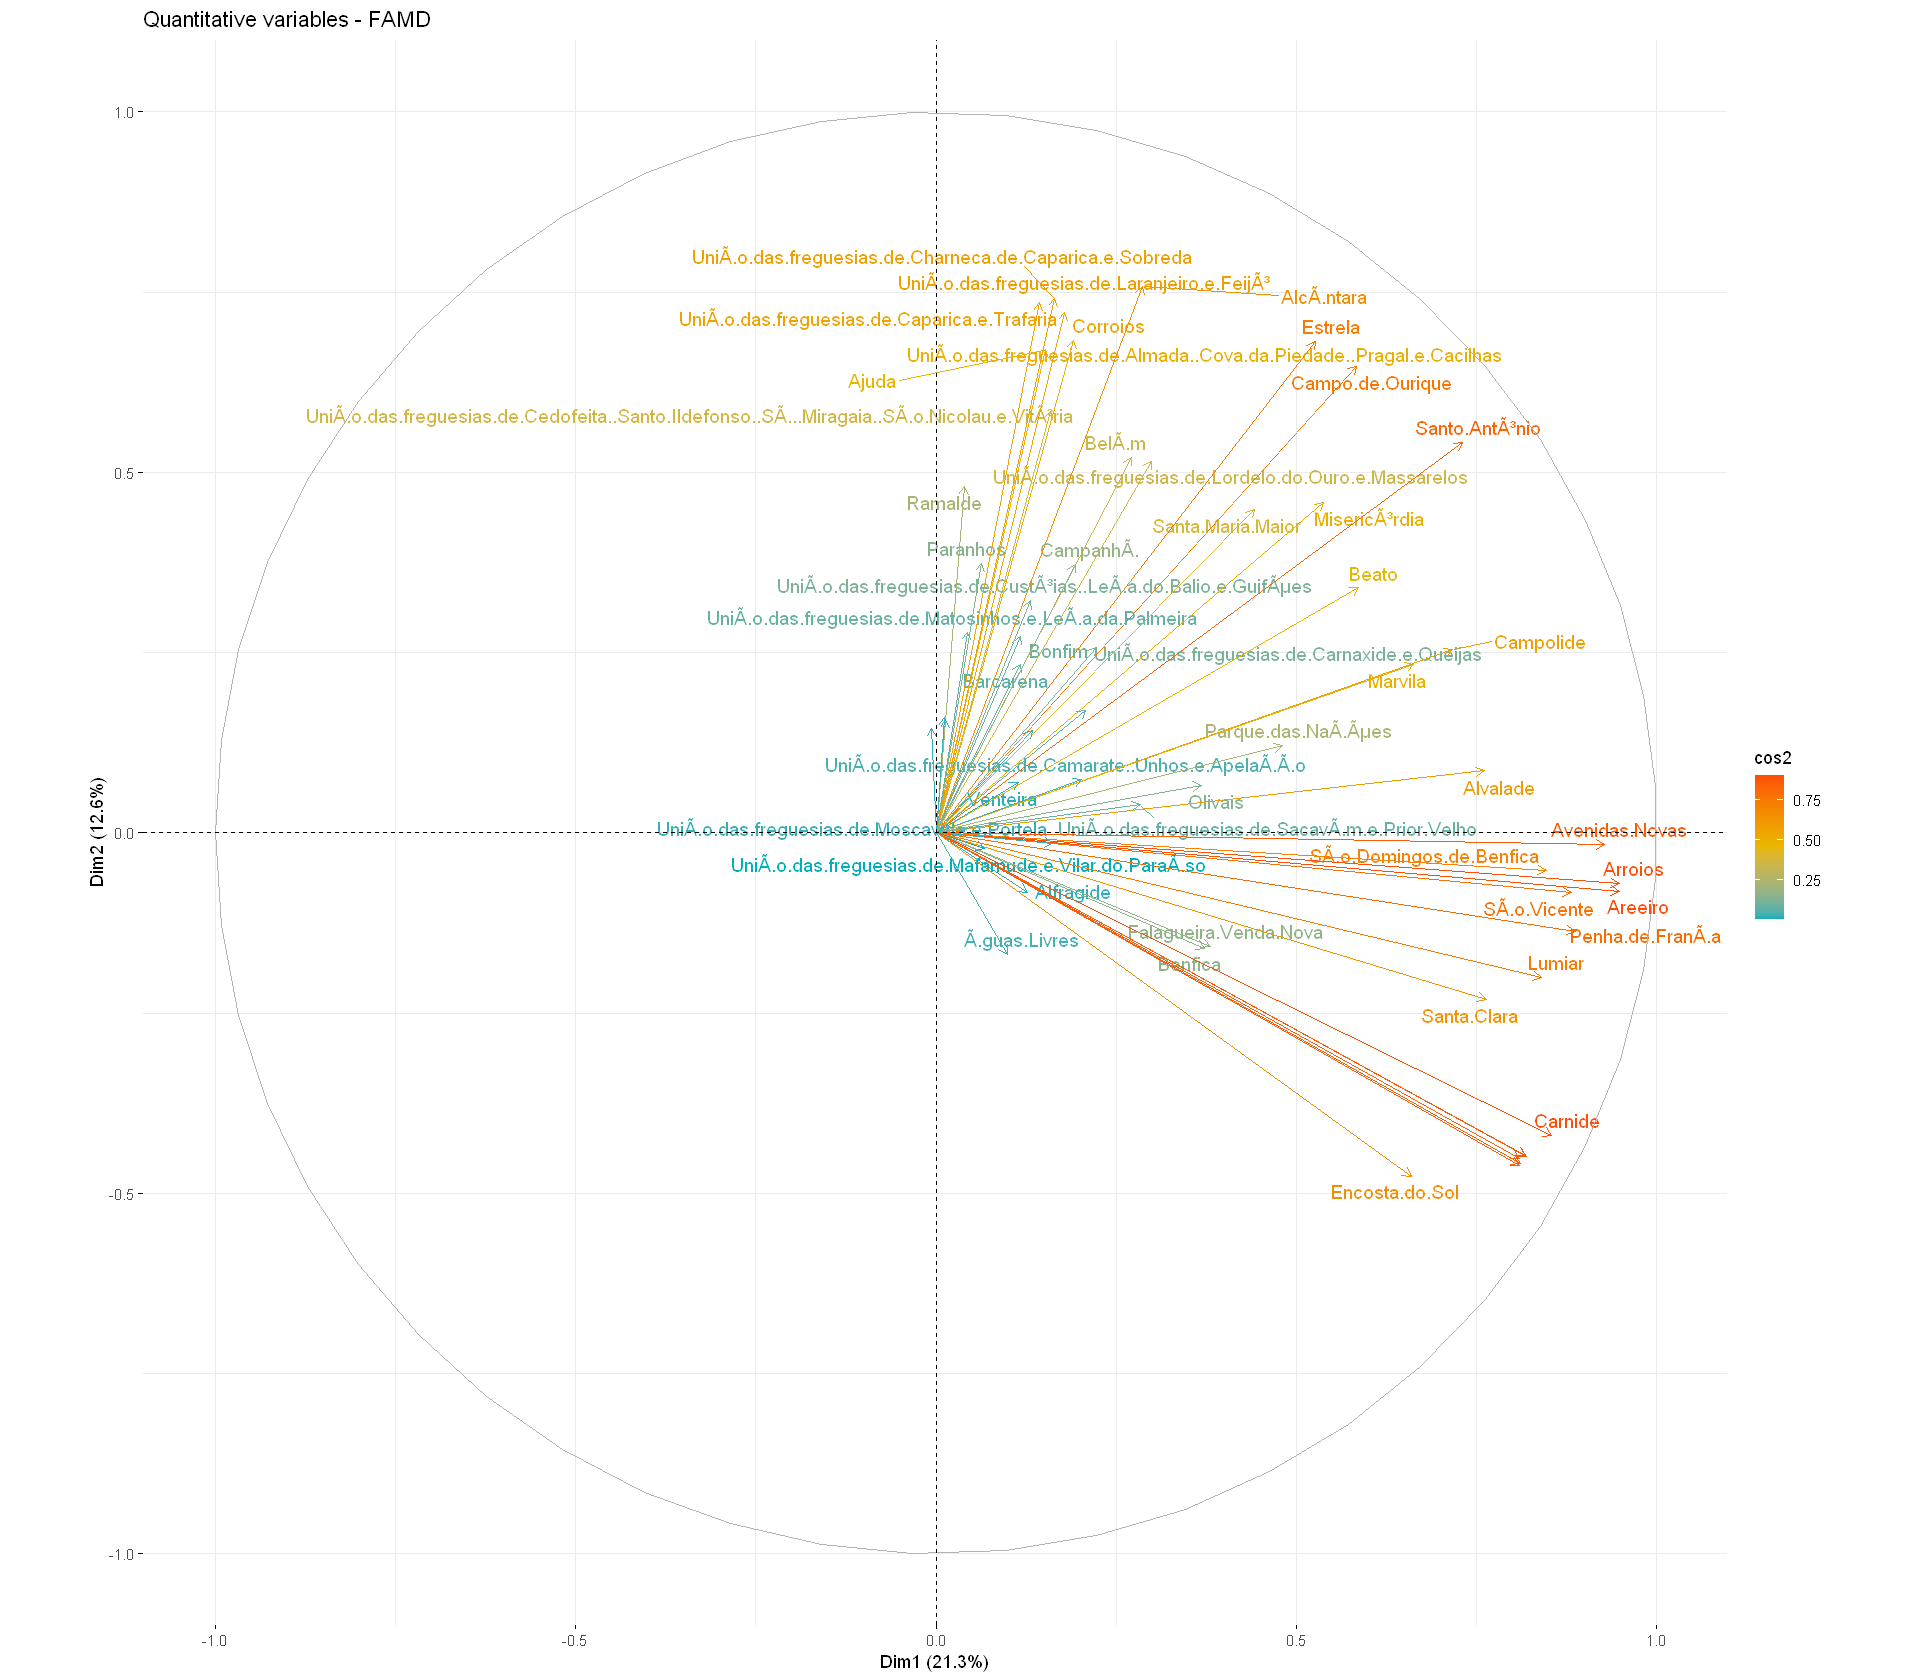

In [176]:
#enlarged picture of the varibales on dimensions (1,2)
library(repr)
options(repr.plot.width=16, repr.plot.height=14)

fviz_famd_var(res_FAMD_L_Post_1, "quanti.var", col.var = "cos2", axes = c(1,2),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

#### Perfomed a similar analysis above to check the main churn groups in Lisbon after Covid, but a preliminary analysis indeed shows the pattern is similar but some churn groups might have changed. 
#### For instance, bellow, from Cascais origin to some Porto destinations the male students are now the biggest bus traveler group  and not the senior females as before, even though senior females now are the second highest traveler grooup from that OD pair, so pattern has changed a little bit but not that heavily, but further analysis on the available plots is required.

Warning message:
"ggrepel: 153 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 54 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


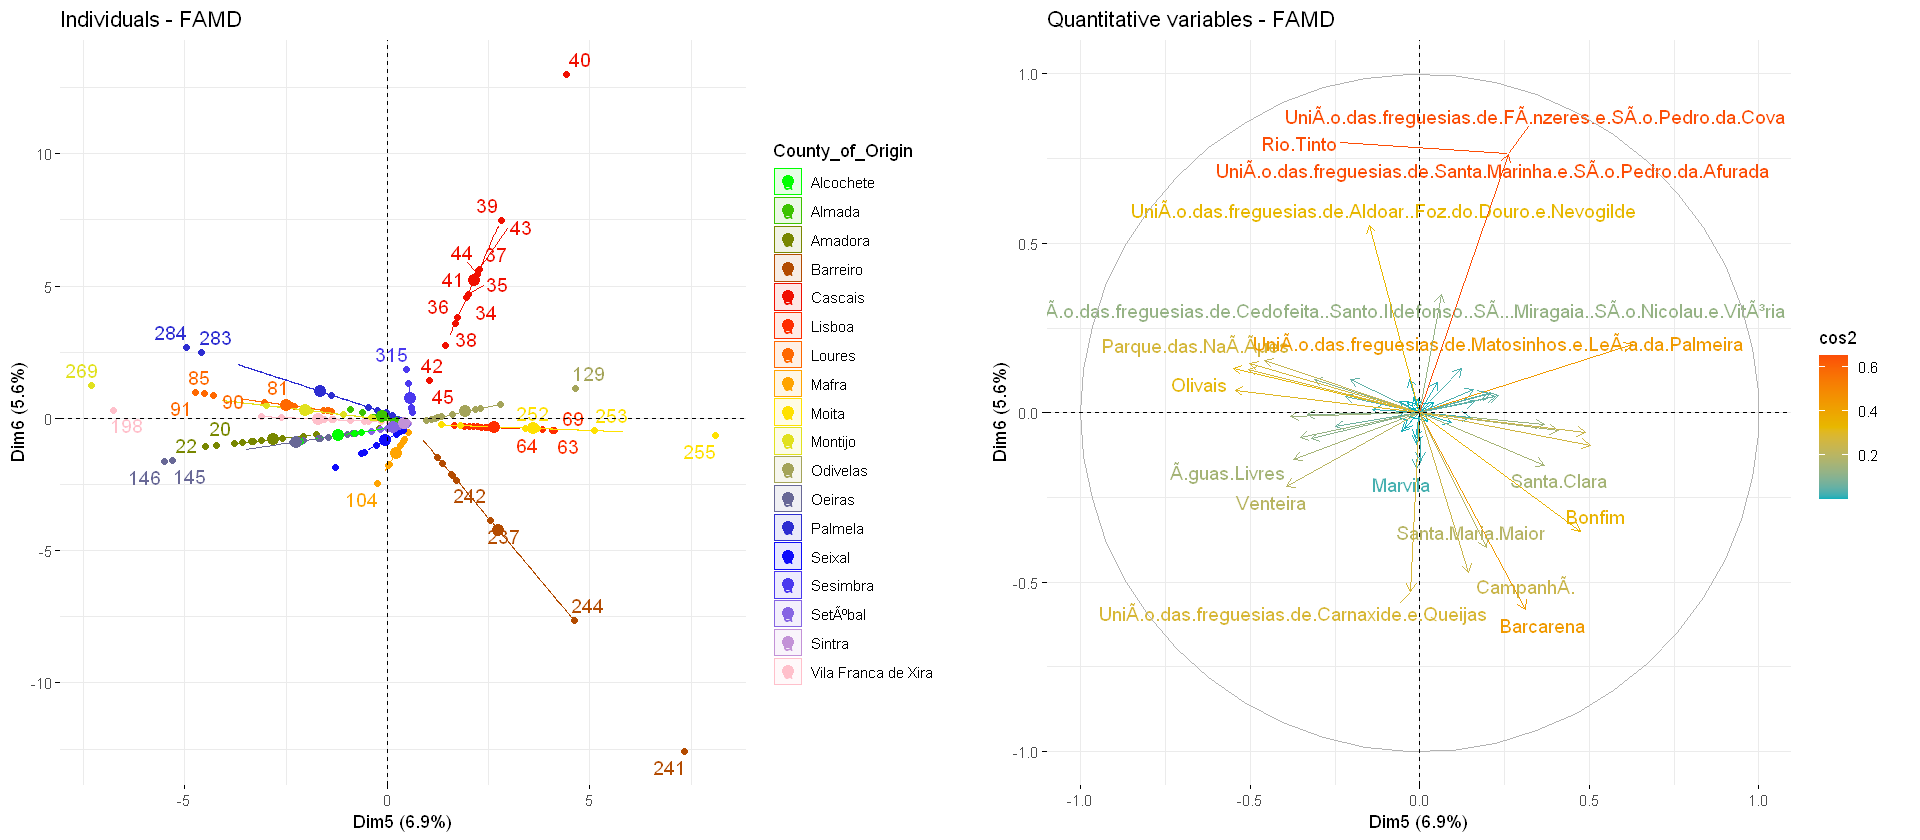

In [177]:
library(RColorBrewer)
library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(gridExtra)


# Define the number of colors you want
nb.cols <- 18
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_L_Post_1, axes=c(5,6),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_famd_var(res_FAMD_L_Post_1, "quanti.var", col.var = "cos2", axes = c(5,6),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

gridExtra::grid.arrange(a,b, ncol=2)

In [178]:
Data_FAMD_2a

,County_of_Origin,GenderDescription,AgeClassDescription,Ajuda,AlcÃ.ntara,Alfragide,Alvalade,Areeiro,Arroios,Avenidas.Novas,...,UniÃ.o.das.freguesias.de.Moscavide.e.Portela,UniÃ.o.das.freguesias.de.Pontinha.e.FamÃµes,UniÃ.o.das.freguesias.de.PÃ³voa.de.Santo.AdriÃ.o.e.Olival.Basto,UniÃ.o.das.freguesias.de.Ramada.e.CaneÃ.as,UniÃ.o.das.freguesias.de.SacavÃ.m.e.Prior.Velho,UniÃ.o.das.freguesias.de.Santa.Marinha.e.SÃ.o.Pedro.da.Afurada,UniÃ.o.das.freguesias.de.Santo.AntÃ³nio.dos.Cavaleiros.e.Frielas,UniÃ.o.das.freguesias.de.SÃ.o.Mamede.de.Infesta.e.Senhora.da.Hora,Venteira,Ã.guas.Livres
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,Amadora,Female,15-24,3.2836849,16.037253,21.8796817,32.917703,5.5168106,7.0607475,11.6513059,...,0.60173387,0.397122356,0,0,0.36907078,0.000000000,0,0.00000000,0.271165265,8.94845375
12,Amadora,Female,25-34,1.8490838,9.030777,12.3207213,18.536369,3.1065847,3.9759949,6.5609955,...,0.33884384,0.223624545,0,0,0.20782835,0.000000000,0,0.00000000,0.152696538,5.03898576
13,Amadora,Female,35-44,2.1968406,10.729193,14.6378761,22.022499,3.6908393,4.7237592,7.7949202,...,0.40257011,0.265681554,0,0,0.24691457,0.000000000,0,0.00000000,0.181414136,5.98666649
14,Amadora,Female,45-54,2.7369942,13.367260,18.2370005,27.437335,4.5983337,5.8852253,9.7115157,...,0.50155304,0.331006671,0,0,0.30762531,0.000000000,0,0.00000000,0.226019790,7.45865308
15,Amadora,Female,55-64,3.4833494,17.012398,23.2100761,34.919265,5.8522603,7.4900764,12.3597638,...,0.63832231,0.421269387,0,0,0.39151213,0.000000000,0,0.00000000,0.287653474,9.49256463
16,Amadora,Female,65+,0.2280100,1.113583,1.5192646,2.285714,0.3830721,0.4902788,0.8090345,...,0.04178274,0.027575079,0,0,0.02562725,0.000000000,0,0.00000000,0.018828967,0.62135590
17,Amadora,Male,15-24,3.9696931,19.387662,26.4506568,39.794677,6.6693504,8.5358376,14.0854286,...,0.72744460,0.480086836,0,0,0.44617488,0.000000000,0,0.00000000,0.327815526,10.81791237
18,Amadora,Male,25-34,1.2751451,6.227706,8.4964820,12.782849,2.1423292,2.7418824,4.5245225,...,0.23366981,0.154213531,0,0,0.14332033,0.000000000,0,0.00000000,0.105300929,3.47493065
19,Amadora,Male,35-44,3.5236677,17.209310,23.4787233,35.323441,5.9199979,7.5767709,12.5028230,...,0.64571063,0.426145409,0,0,0.39604372,0.000000000,0,0.00000000,0.290982945,9.60243719


## Pre- covid Porto analysis

In [144]:
Churner_FAMD_P <- read.csv(file = "Churner_FMDA_Porto", row.names=1)
# analyze the two periods in separate to see if there is any difference:
Data_Porto_1 <- subset(Churner_FAMD_P, Period == 0) #pre-covid
Data_Porto_2 <- subset(Churner_FAMD_P, Period == 1) #pos-covid

Data_Porto_1 =  subset(Data_Porto_1, select = -Period) #remove Period column

In [145]:
#check for irrelavant columns
colSums(Data_Porto_1[,-c(1,2,3)])
# some releavnt destinations might exist only post-covid...

Agrela 
                                                                               7.210429e+00 
                                                                            Aguiar.de.Sousa 
                                                                               1.231566e+01 
                                                                                      Ajuda 
                                                                               1.901415e+01 
                                                                                 AlcÃ.ntara 
                                                                               5.269283e+01 
                                                                                     Alfena 
                                                                               2.832508e+02 
                                                                                  Alfragide 
                                                                               6.172615e+00 
                                                                                   Alvalade 
                                                                               5.458627e+03 
                                                                                    Areeiro 
                                                                               1.208519e+03 
                                                                                    Arroios 
                                                                               2.662054e+02 
                                                                                    Aveleda 
                                                                               5.692379e+00 
                                                                             Avenidas.Novas 
                                                                               5.002043e+02 
                                                                Baguim.do.Monte..Rio.Tinto. 
                                                                               2.952998e+02 
                                                                                      Beato 
                                                                               1.381648e+01 
                                                                                     BelÃ.m 
                                                                               1.477561e+02 
                                                                                    Benfica 
                                                                               6.023607e+02 
                                                                                     Bonfim 
                                                                               9.966666e+03 
                                                                                  CampanhÃ. 
                                                                               1.947370e+04 
                                                                           Campo.de.Ourique 
                                                                               5.390886e+01 
                                                                                  Campolide 
                                                                               9.178007e+01 
                                                                                   Canidelo 
                                                                               6.675771e+01 
                                                                                    Carnide 
                                                                               2.213439e+01 
                                                                           CastÃªlo.da.Maia 
                                                                               2.88837

In [146]:
Data_Porto_1=subset(Data_Porto_1, select=-UniÃ.o.das.freguesias.de.Queluz.e.Belas) # column with all zero values
Data_Porto_1=subset(Data_Porto_1, select=-Mina.de.Ã.gua) #column with all 0 values

In [147]:
res_FAMD_P= FAMD(Data_Porto_1, ncp = 10, sup.var = 2:3, ind.sup = NULL, graph = TRUE)

Warning message:
"ggrepel: 81 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 81 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


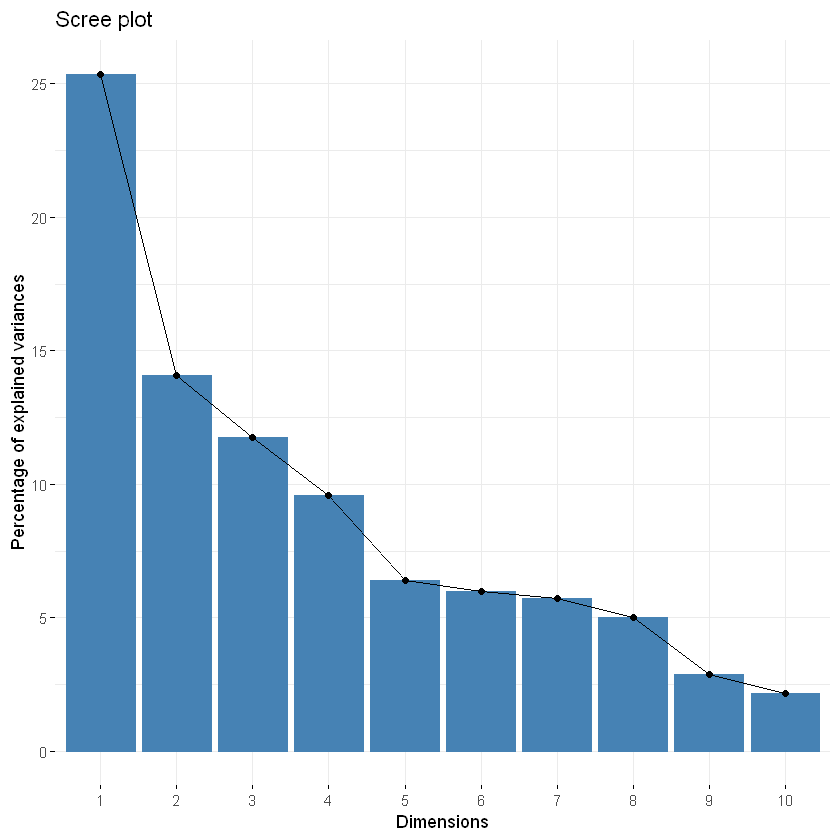

In [148]:
library(repr)
options(repr.plot.width=7, repr.plot.height=7)
fviz_screeplot(res_FAMD_P)

Warning message:
"ggrepel: 84 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 81 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


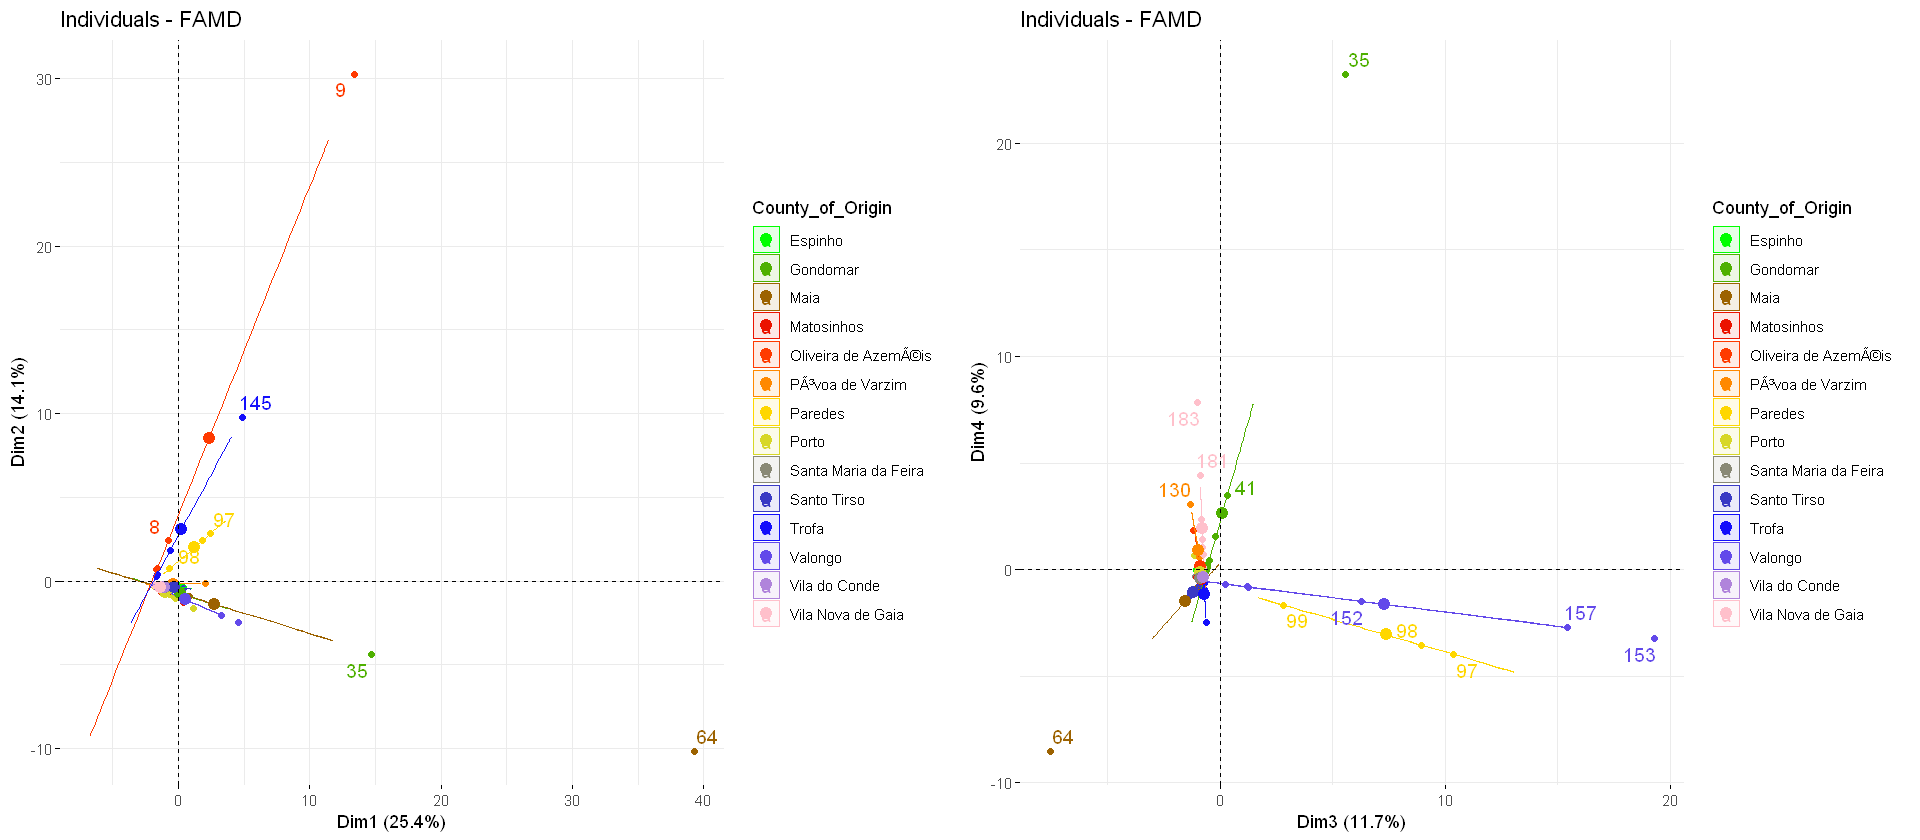

In [149]:
library(gridExtra)

library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(RColorBrewer)
# Define the number of colors you want
nb.cols <- 14
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_P, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_mfa_ind(res_FAMD_P, axes=c(3,4),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

gridExtra::grid.arrange(a,b, ncol=2)

In [150]:
which(rownames(Data_Porto_1) %in% c('9', '35', '64')) # main outlier groups

[1]  6 19 36

In [151]:
Data_Porto_1a=Data_Porto_1[-c(6,19,36),] # remove individual outliers

In [153]:
#check for irrelavant columns again
colSums(Data_Porto_1a[,-c(1,2,3)]) #none

Agrela 
                                                                               7.210429e+00 
                                                                            Aguiar.de.Sousa 
                                                                               9.278106e+00 
                                                                                      Ajuda 
                                                                               1.347620e+01 
                                                                                 AlcÃ.ntara 
                                                                               3.701343e+01 
                                                                                     Alfena 
                                                                               2.637227e+02 
                                                                                  Alfragide 
                                                                               6.172615e+00 
                                                                                   Alvalade 
                                                                               5.130110e+02 
                                                                                    Areeiro 
                                                                               4.060896e+02 
                                                                                    Arroios 
                                                                               8.354383e+01 
                                                                                    Aveleda 
                                                                               2.527839e+00 
                                                                             Avenidas.Novas 
                                                                               3.124451e+02 
                                                                Baguim.do.Monte..Rio.Tinto. 
                                                                               1.386190e+02 
                                                                                      Beato 
                                                                               4.727099e+00 
                                                                                     BelÃ.m 
                                                                               9.956183e+01 
                                                                                    Benfica 
                                                                               5.560743e+02 
                                                                                     Bonfim 
                                                                               3.461207e+03 
                                                                                  CampanhÃ. 
                                                                               5.377013e+03 
                                                                           Campo.de.Ourique 
                                                                               4.007464e+01 
                                                                                  Campolide 
                                                                               5.440958e+01 
                                                                                   Canidelo 
                                                                               6.675771e+01 
                                                                                    Carnide 
                                                                               1.278911e+01 
                                                                           CastÃªlo.da.Maia 
                                                                               6.08917

In [154]:
res_FAMD_P_2= FAMD(Data_Porto_1a, ncp = 10, sup.var = 2:3, ind.sup = NULL, graph = TRUE)

Warning message:
"ggrepel: 75 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 75 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


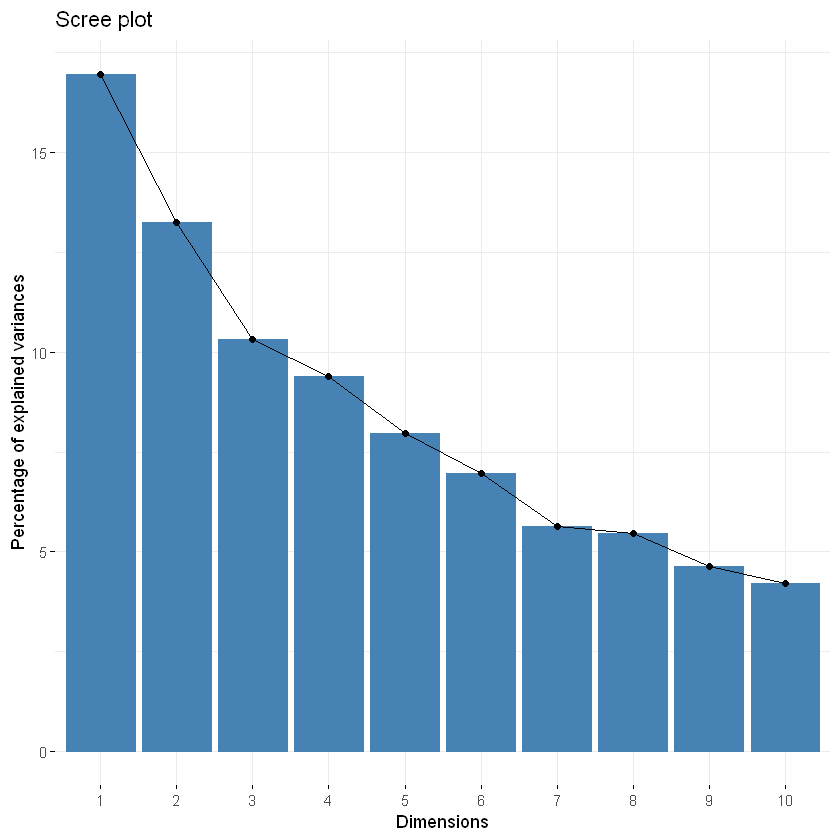

In [155]:
library(repr)
options(repr.plot.width=7, repr.plot.height=7)
fviz_screeplot(res_FAMD_P_2)

Warning message:
"ggrepel: 78 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 72 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


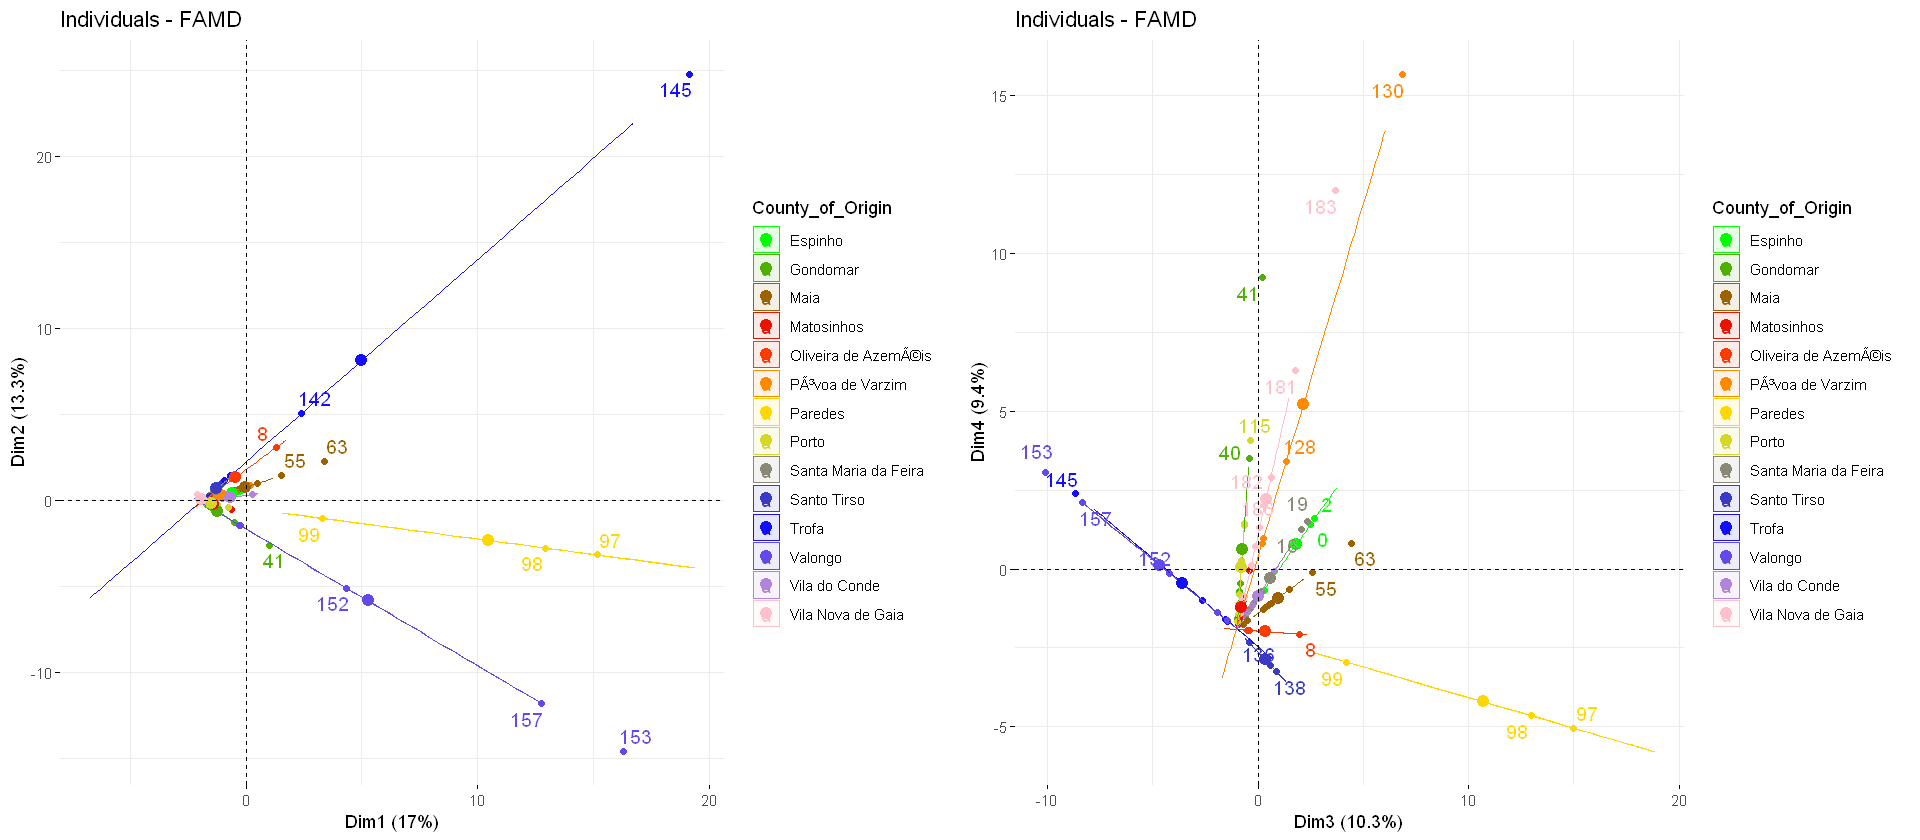

In [156]:
library(gridExtra)

library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(RColorBrewer)
# Define the number of colors you want
nb.cols <- 14
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_P_2, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_mfa_ind(res_FAMD_P_2, axes=c(3,4),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

gridExtra::grid.arrange(a,b, ncol=2)

#### There are no heavier outliers now

### Churner analysis

Warning message:
"Removed 7 rows containing non-finite values (stat_mean)."
Warning message:
"Removed 7 rows containing missing values (geom_point)."
Warning message:
"Removed 7 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 4 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 4 rows containing missing values (geom_segment)."
Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"Removed 7 rows containing non-finite values (stat_mean)."
Warning message:
"Removed 7 rows containing missing values (geom_point)."
Warning message:
"Removed 7 rows containing missing values (geom_text_repel)."
Warning message:
"Removed 7 rows containing non-finite values (stat_mean)."
Warning message:
"Removed 7 rows containing missing values (geom_point)."
Warning message:
"Removed 7 rows containing missing values (geom_text_repel)."
Warning message:
"ggrepel: 72 unlabeled data points (too many overlaps). Consider 

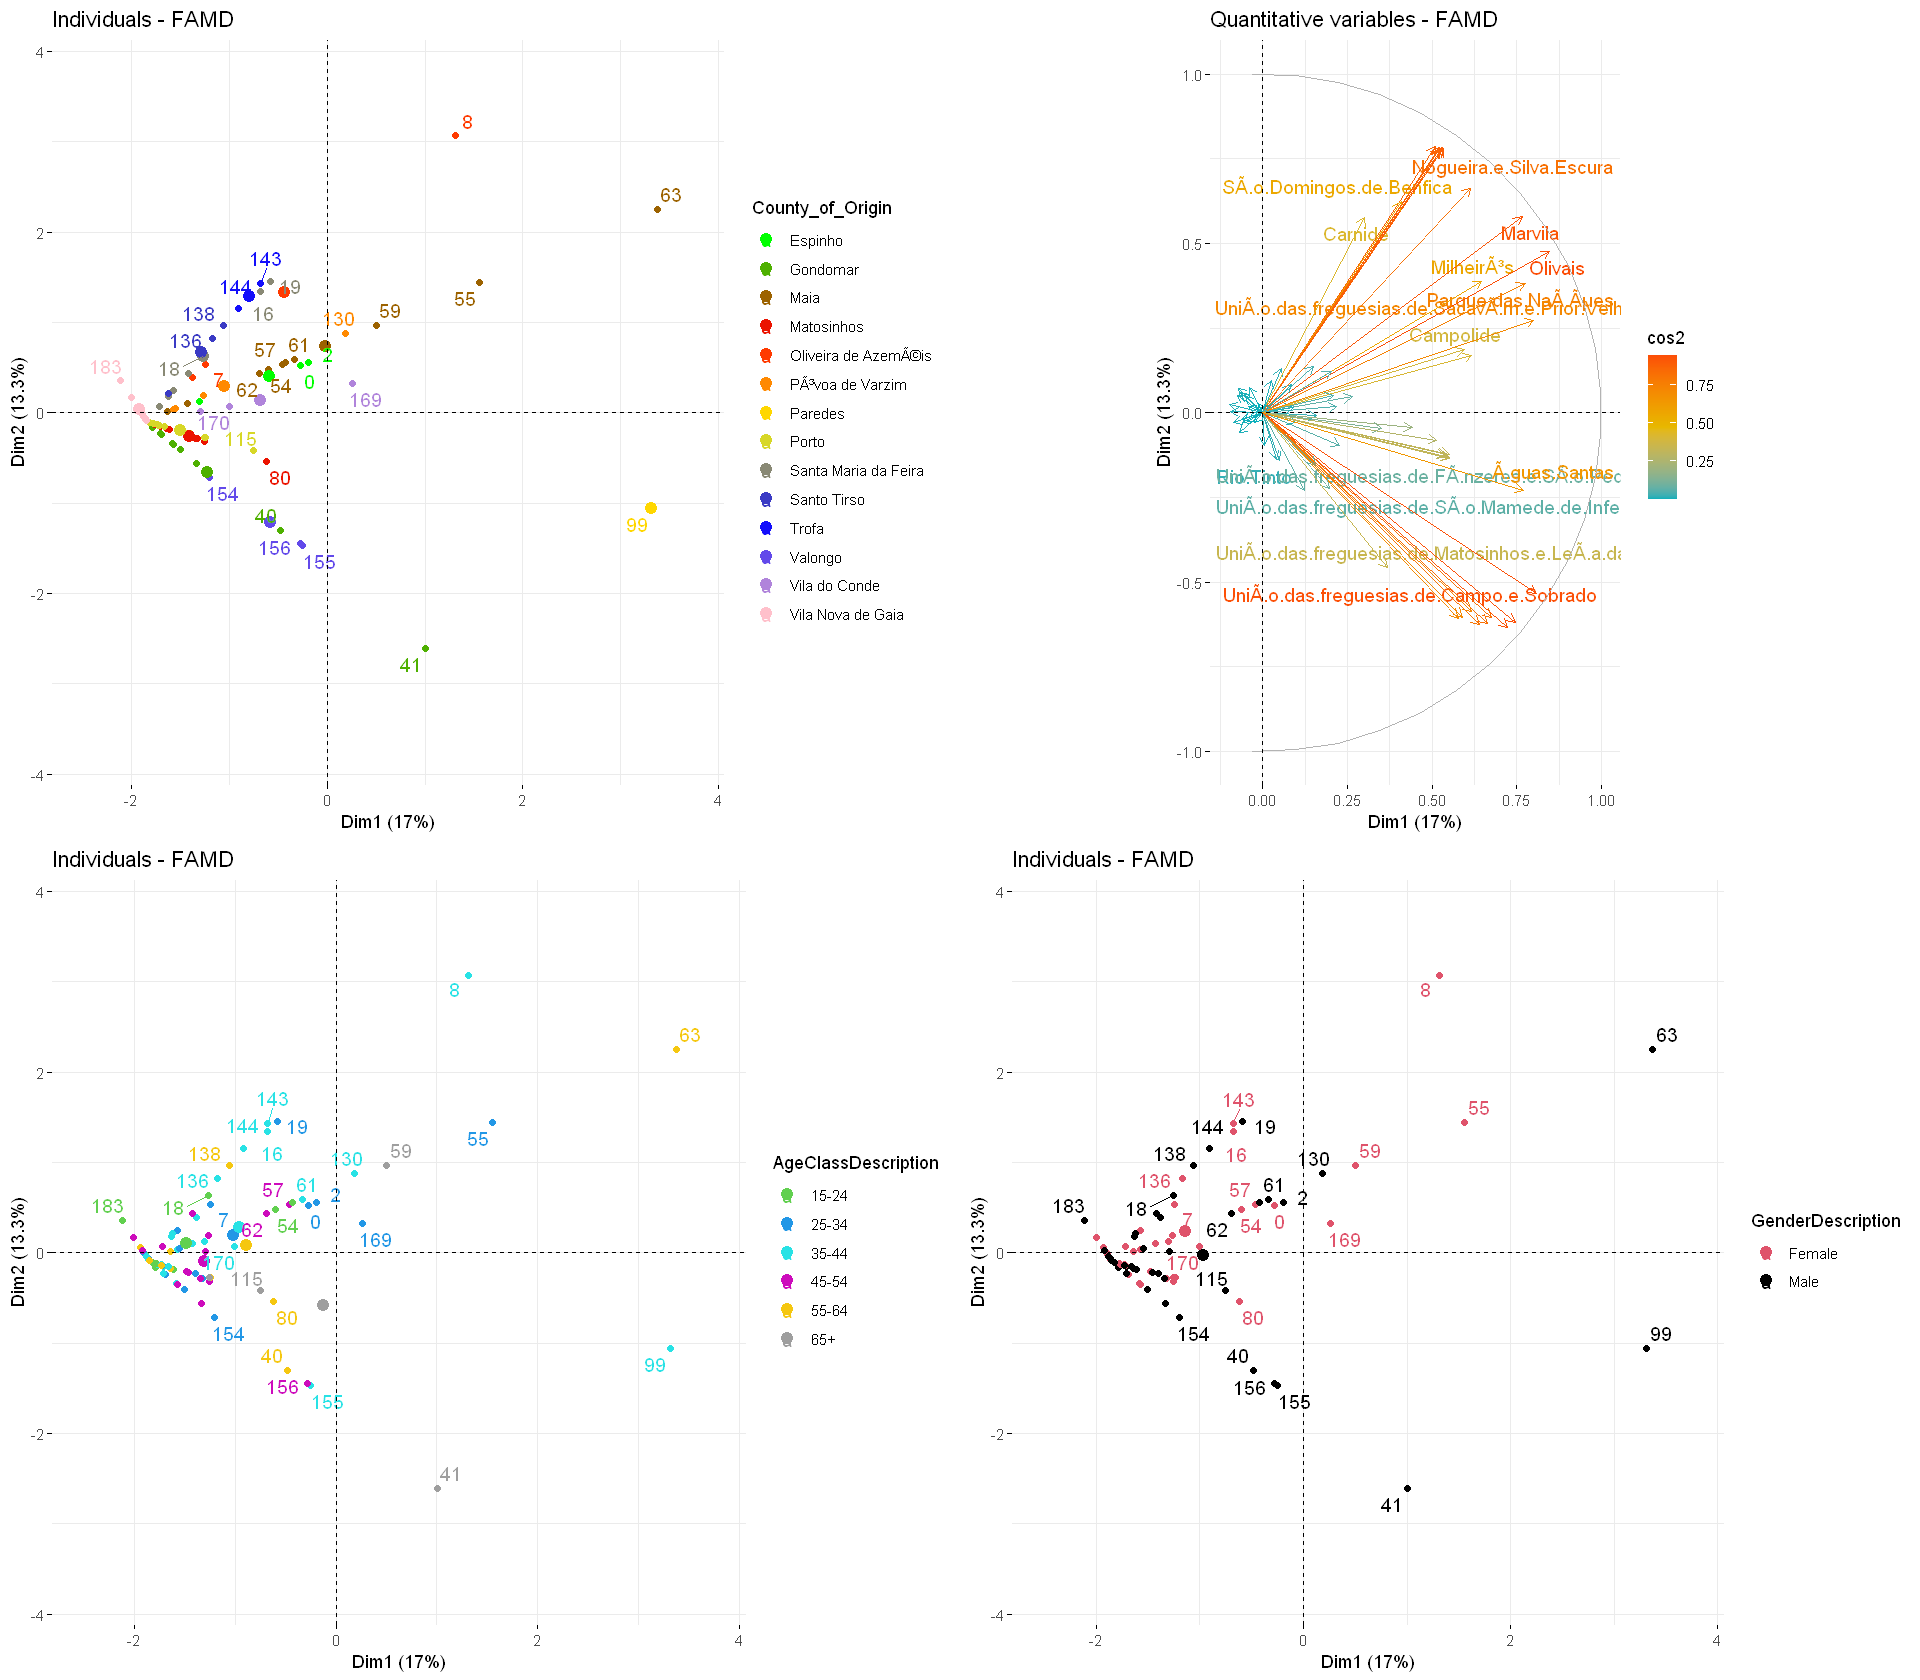

In [157]:
library(RColorBrewer)
library(repr)
options(repr.plot.width=16, repr.plot.height=14)

library(gridExtra)
# Define the number of colors you want
nb.cols <- 14
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_FAMD_P_2, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             #addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             ) + xlim(-2.5,3.75) + ylim(-3.75,3.75)

b=fviz_famd_var(res_FAMD_P_2, "quanti.var", col.var = "cos2", axes = c(1,2),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE) + xlim(-0.1,1) + ylim(-1,1)

c=fviz_mfa_ind(res_FAMD_P_2, axes=c(1,2),
             habillage = "AgeClassDescription", # color by groups 
             palette = c(3:8), 
             repel = TRUE # Avoid text overlapping
             ) + xlim(-2.5,3.75) + ylim(-3.75,3.75)

d=fviz_mfa_ind(res_FAMD_P_2, axes=c(1,2),
             habillage = "GenderDescription", # color by groups 
             palette = c(2,1), 
             repel = TRUE # Avoid text overlapping
             ) + xlim(-2.5,3.75) + ylim(-3.75,3.75)

gridExtra::grid.arrange(a,b,c,d, ncol=2)

Warning message:
"ggrepel: 70 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


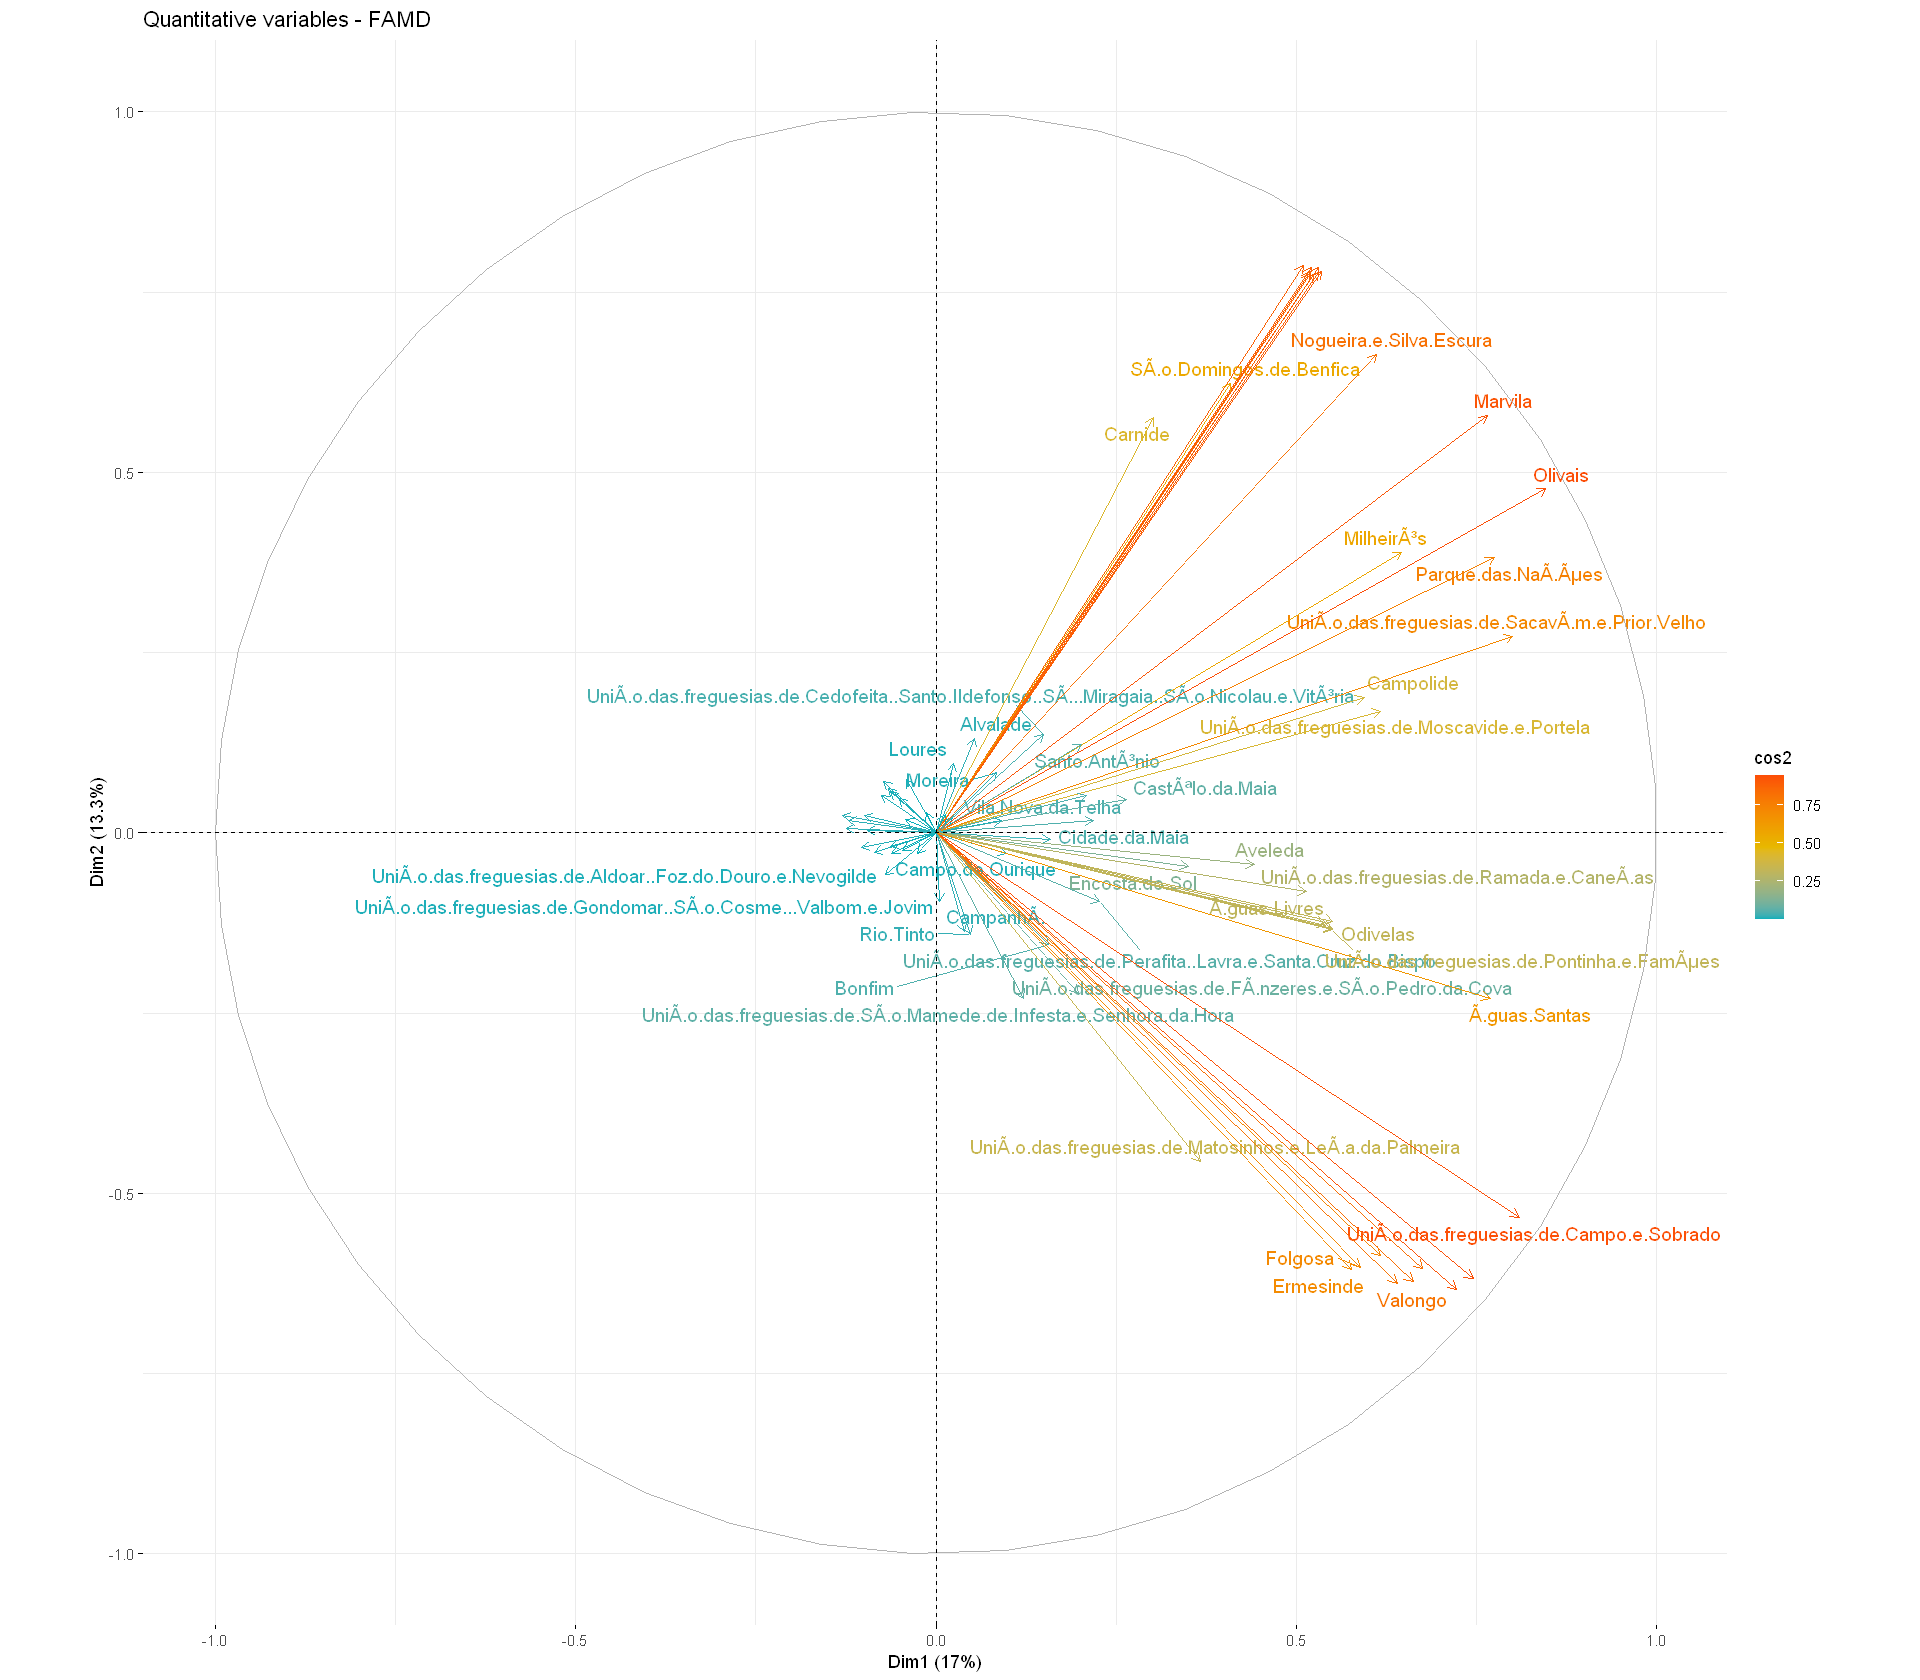

In [158]:
#enlarged picture of the varibales on dimensions (1,2)
library(repr)
options(repr.plot.width=16, repr.plot.height=14)

fviz_famd_var(res_FAMD_P_2, "quanti.var", col.var = "cos2", axes = c(1,2),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

#### A more detailed analysis shows for instance that travelers from Paredes heading to most probably to Águas Santas have as the most churner groups among them the 35-44 years old males.

In [181]:
pca <- prcomp( Data_Porto_1a[,-c(1,2,3)], scale.= TRUE )

In [183]:
library(pca3d)
gr <- factor(Data_Porto_1a[,1])

pca3d(pca, group=gr)


snapshotPCA3d(file="pca3D_Porto_2.png")

[1] 0.3930382 0.4789616 0.2657908


Warning message in rgl.snapshot(filename = file, fmt = "png", top = TRUE):
"RGL: PNG Pixmap Saver Warning: Image width is zero in IHDR"
Warning message in rgl.snapshot(filename = file, fmt = "png", top = TRUE):
"RGL: PNG Pixmap Saver Warning: Image height is zero in IHDR"
Warning message in rgl.snapshot(filename = file, fmt = "png", top = TRUE):
"RGL: PNG Pixmap Saver Error: Invalid IHDR data"
Warning message in rgl.snapshot(filename = file, fmt = "png", top = TRUE):
"RGL: PNG Pixmap Saver Error: an error occured"
Warning message in rgl.snapshot(filename = file, fmt = "png", top = TRUE):
"'rgl.snapshot' failed"


## Post-covid - Porto

In [184]:
Data_Porto_2 =  subset(Data_Porto_2, select = -Period) #remove Period column

In [186]:
#check for irrelavant columns
colSums(Data_Porto_2[,-c(1,2,3)]) #none

In [188]:
res_Post_P= FAMD(Data_Porto_2, ncp = 10, sup.var = 2:3, ind.sup = NULL, graph = FALSE)

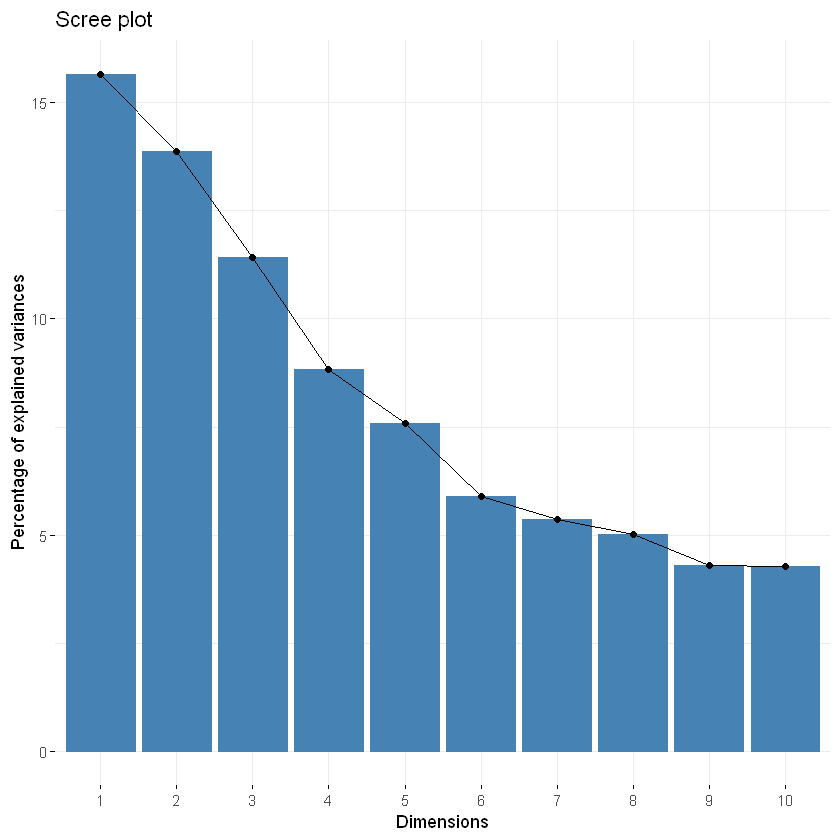

In [190]:
library(repr)
options(repr.plot.width=7, repr.plot.height=7)
fviz_screeplot(res_Post_P)

Warning message:
"ggrepel: 106 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 108 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


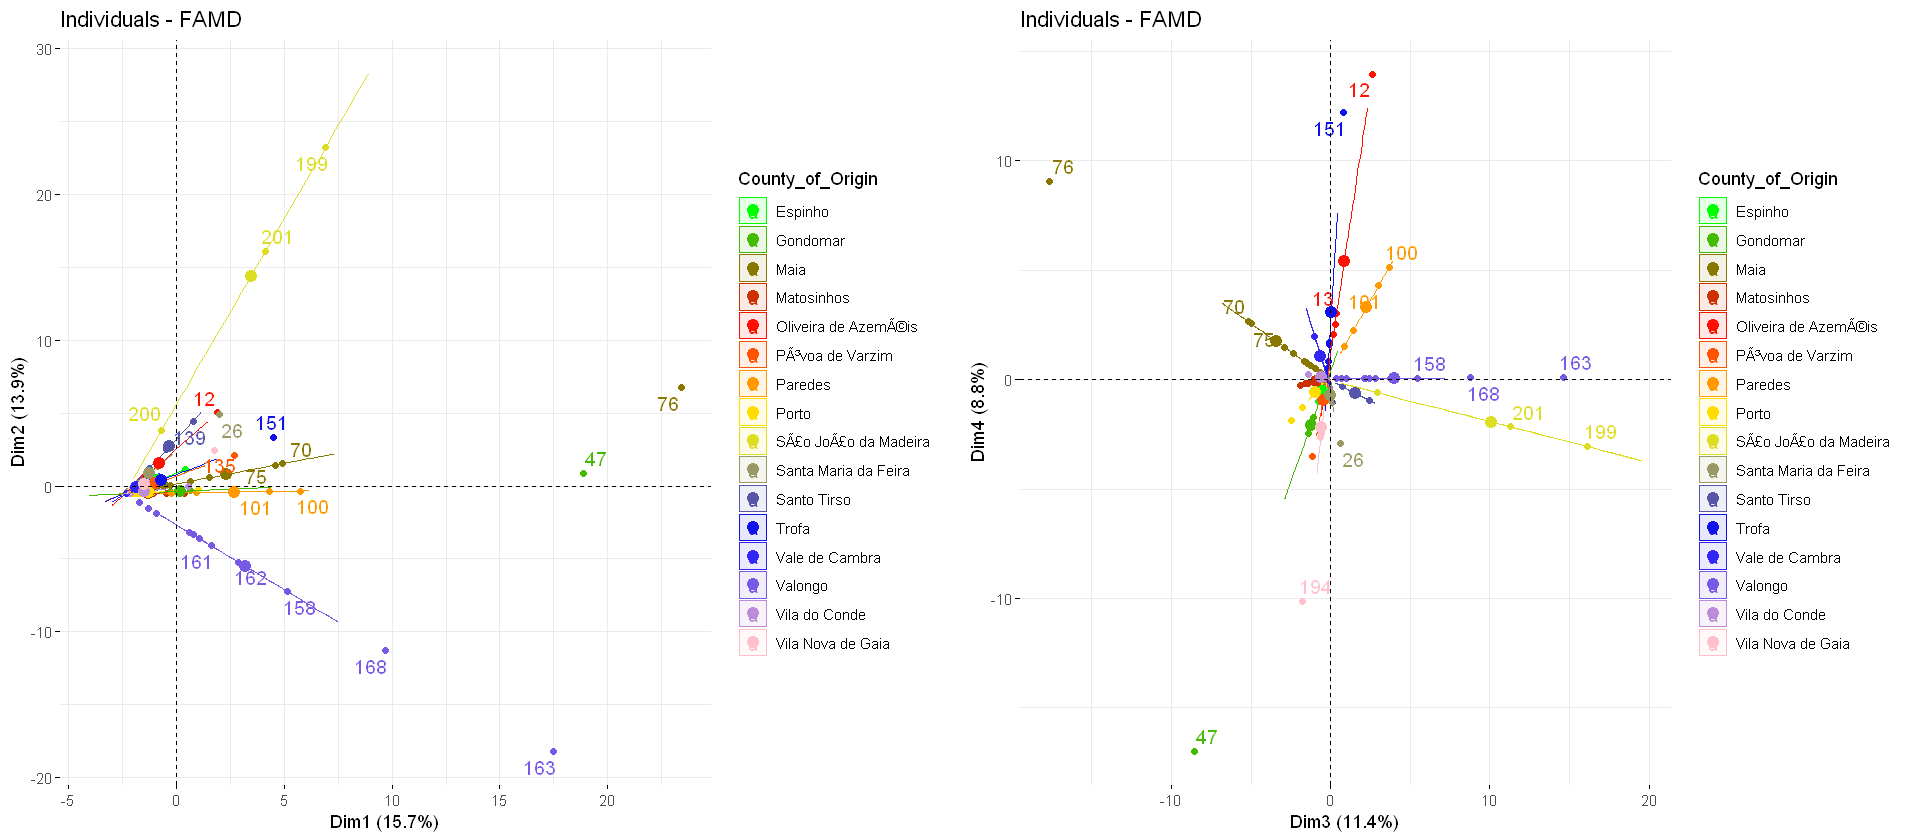

In [192]:
library(gridExtra)

library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(RColorBrewer)
# Define the number of colors you want
nb.cols <- 16
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_Post_P, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_mfa_ind(res_Post_P, axes=c(3,4),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

gridExtra::grid.arrange(a,b, ncol=2)

In [193]:
#Outlier Individual groups 47, 78, 163, 199
which(rownames(Data_Porto_2) %in% c('47', '78', '163', '199'))

[1]  23  88 111

In [194]:
Data_Porto_2a=Data_Porto_2[-c(23,88,111),] # remove individual outliers

In [195]:
#check for irrelavant columns
colSums(Data_Porto_2a[,-c(1,2,3)]) #none

Agrela 
                                                                               6.482309e+00 
                                                                            Aguiar.de.Sousa 
                                                                               8.027468e+00 
                                                                                      Ajuda 
                                                                               1.560846e+01 
                                                                                 AlcÃ.ntara 
                                                                               3.233348e+01 
                                                                                     Alfena 
                                                                               2.419526e+02 
                                                                                  Alfragide 
                                                                               8.855394e+00 
                                                                                   Alvalade 
                                                                               1.788678e+03 
                                                                                    Areeiro 
                                                                               8.650020e+02 
                                                                                    Arroios 
                                                                               1.210716e+02 
                                                                                    Aveleda 
                                                                               2.856991e+00 
                                                                             Avenidas.Novas 
                                                                               2.587193e+02 
                                                                Baguim.do.Monte..Rio.Tinto. 
                                                                               1.095616e+02 
                                                                                      Beato 
                                                                               5.007247e+00 
                                                                                     BelÃ.m 
                                                                               9.336602e+01 
                                                                                    Benfica 
                                                                               1.234870e+03 
                                                                                     Bonfim 
                                                                               3.152945e+03 
                                                                                  CampanhÃ. 
                                                                               6.440942e+03 
                                                                           Campo.de.Ourique 
                                                                               3.094060e+01 
                                                                                  Campolide 
                                                                               4.845013e+01 
                                                                                   Canidelo 
                                                                               4.584483e+01 
                                                                                    Carnide 
                                                                               1.561844e+01 
                                                                           CastÃªlo.da.Maia 
                                                                               1.14006

In [196]:
res_Post_P_2= FAMD(Data_Porto_2a, ncp = 10, sup.var = 2:3, ind.sup = NULL, graph = FALSE)

Warning message:
"ggrepel: 105 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 103 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


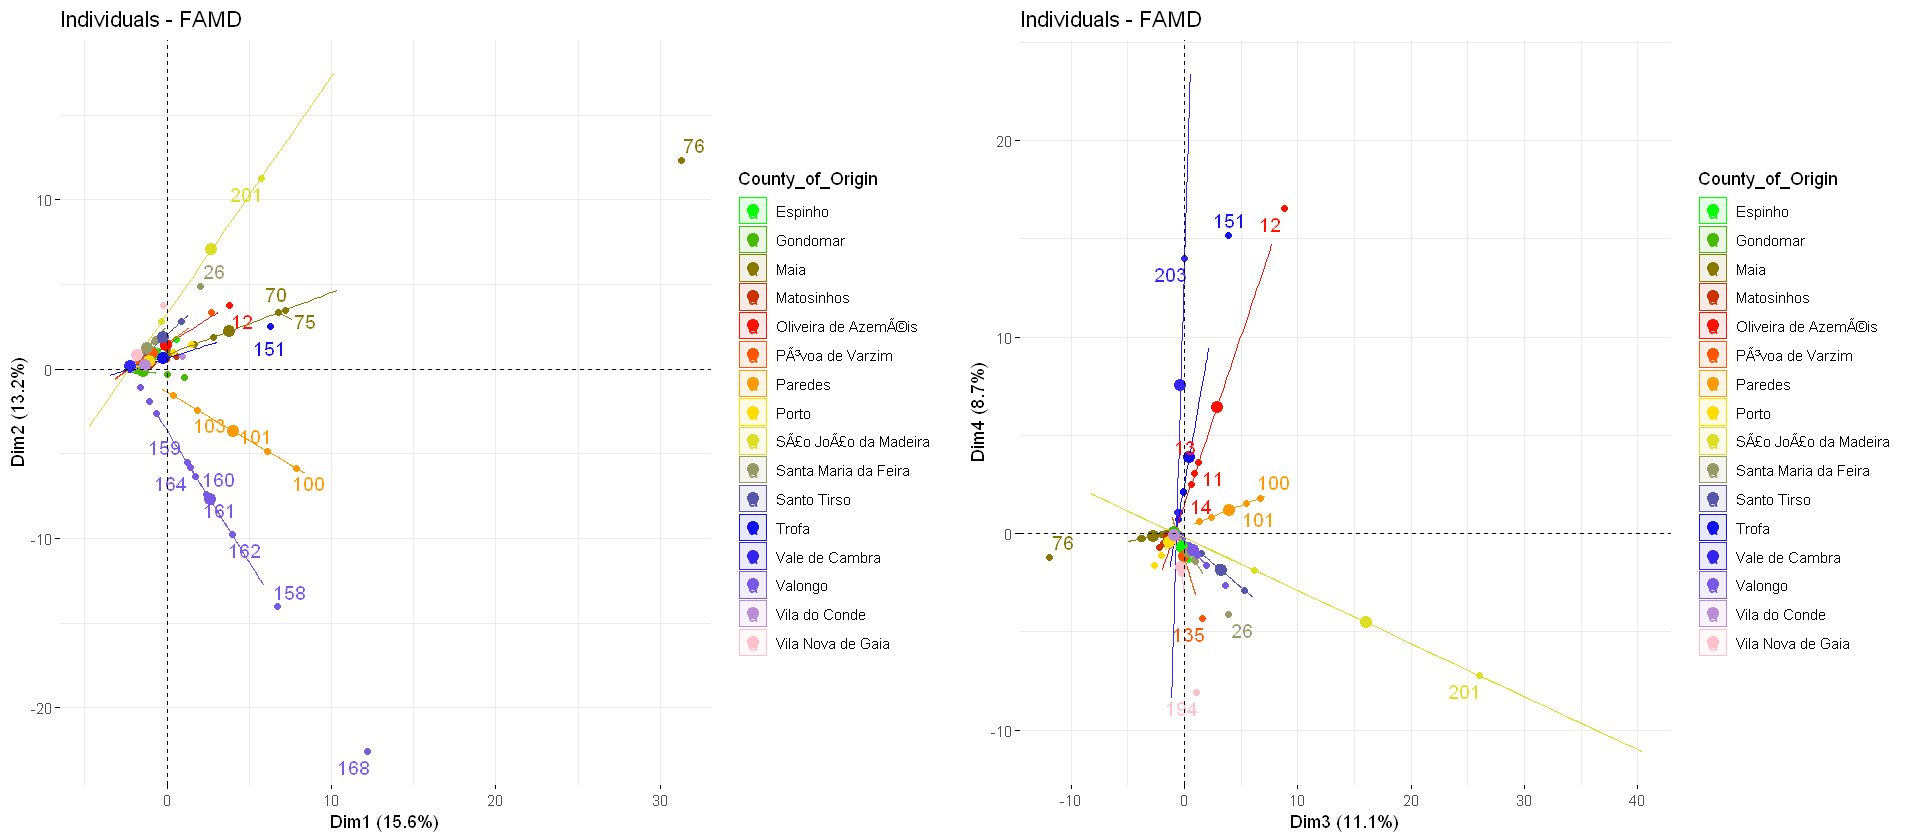

In [197]:
library(gridExtra)

library(repr)
options(repr.plot.width=16, repr.plot.height=7)

library(RColorBrewer)
# Define the number of colors you want
nb.cols <- 16
mycolors <-  colorRampPalette(c('green',"red", "yellow",'blue', "pink"))(nb.cols)


a=fviz_mfa_ind(res_Post_P_2, axes=c(1,2),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

b=fviz_mfa_ind(res_Post_P_2, axes=c(3,4),
             habillage = "County_of_Origin", # color by groups 
             palette = mycolors,
             addEllipses = TRUE, ellipse.type = "confidence", 
             repel = TRUE # Avoid text overlapping
             )

gridExtra::grid.arrange(a,b, ncol=2)

Warning message:
"ggrepel: 73 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


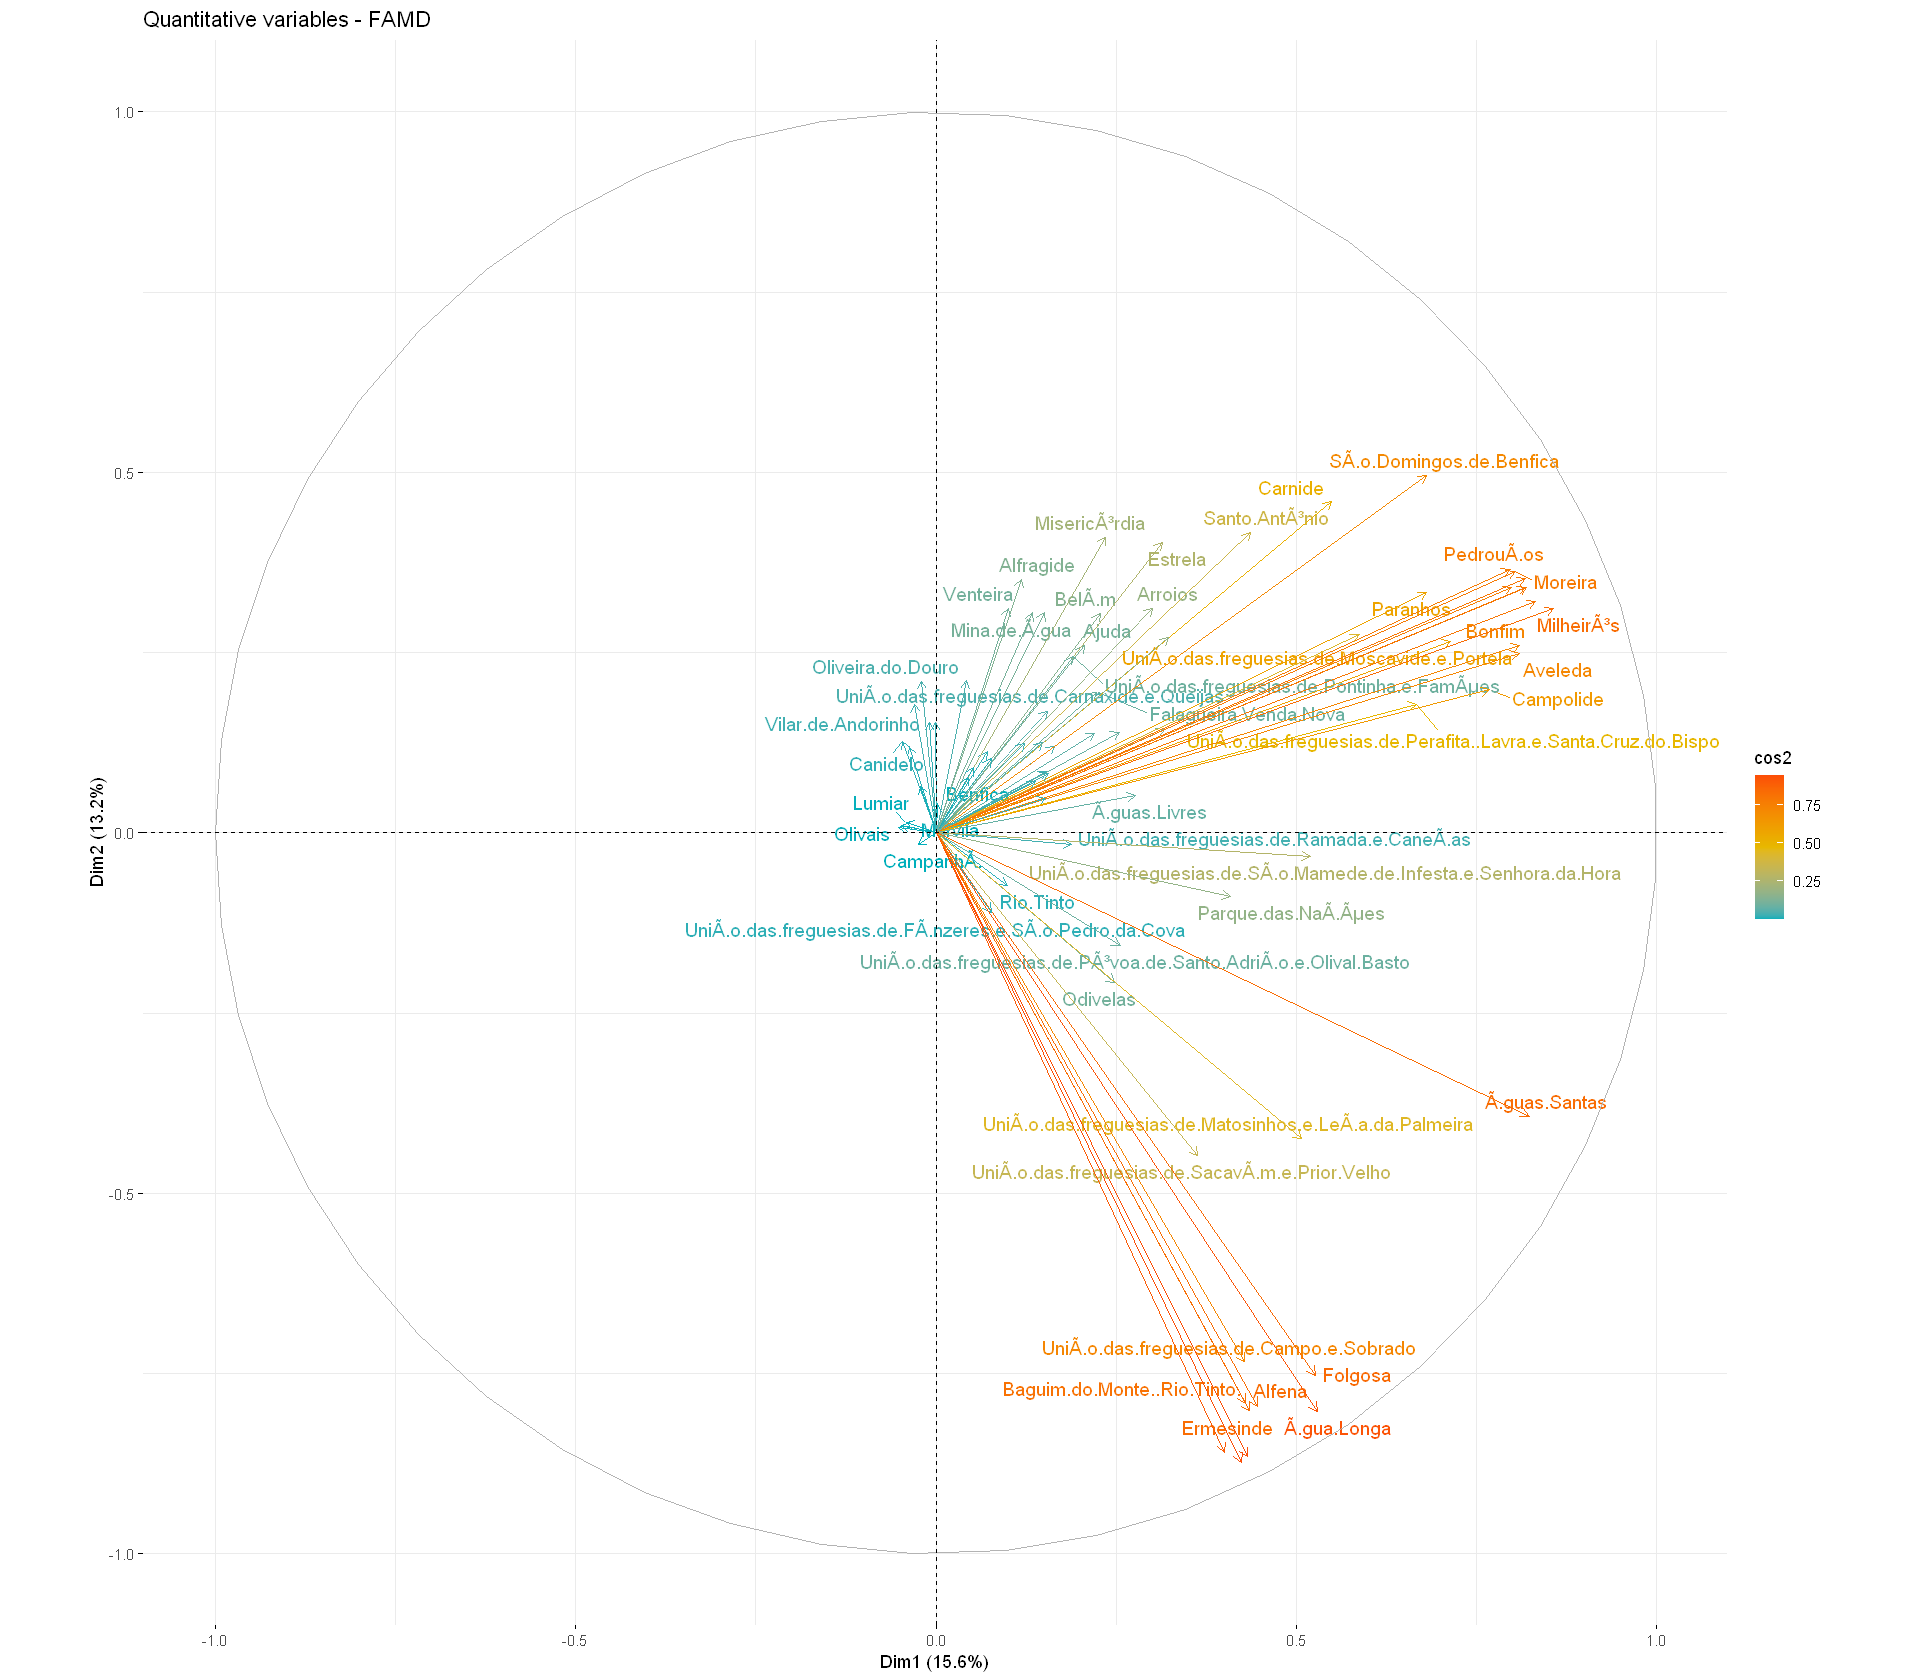

In [201]:
#enlarged picture of the varibales on dimensions (1,2)
library(repr)
options(repr.plot.width=16, repr.plot.height=14)

fviz_famd_var(res_Post_P_2, "quanti.var", col.var = "cos2", axes = c(1,2),
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

#### A more straight forward comparison might not be possible because two new bus destinations were added in Porto region after covid (São João da Madeira and Vale de Cambra). For instance São João da Madeira is a quite dominant origin in the 4 first dimensions. 

#### But for instance from Valongo origin, the main destinations indicated by the first 2 dimensions are Ermesinde, Rio Tinto, Alfena, Água Longa and the main user groups before covid were #153 male students and #157 male seniors, now #168 #163 are both the senior groups travelling more in that OD pair. So again only a slight change on the most intensive users.

In [203]:
Data_Porto_1a

,County_of_Origin,GenderDescription,AgeClassDescription,Agrela,Aguiar.de.Sousa,Ajuda,AlcÃ.ntara,Alfena,Alfragide,Alvalade,...,UniÃ.o.das.freguesias.de.Santa.Marinha.e.SÃ.o.Pedro.da.Afurada,UniÃ.o.das.freguesias.de.Santo.AntÃ³nio.dos.Cavaleiros.e.Frielas,UniÃ.o.das.freguesias.de.SÃ.o.Mamede.de.Infesta.e.Senhora.da.Hora,Valongo,Venteira,Vila.Nova.da.Telha,Vilar.de.Andorinho,Ã.gua.Longa,Ã.guas.Livres,Ã.guas.Santas
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Espinho,Female,25-34,0,0.000000000,0.000000000,1.485133291,0.000000000,0.53006365,0.000000e+00,...,1.399782e+02,0.000000000,3.484412e+00,0.00000000,0.000000000,0.163953622,0.00000000,0.000000000,0.23717563,0.0000000
1,Espinho,Female,35-44,0,0.000000000,0.000000000,0.459171310,0.000000000,0.16388429,0.000000e+00,...,4.327825e+01,0.000000000,1.077305e+00,0.00000000,0.000000000,0.050690938,0.00000000,0.000000000,0.07332961,0.0000000
2,Espinho,Male,25-34,0,0.000000000,0.000000000,1.567643176,0.000000000,0.55951252,0.000000e+00,...,1.477550e+02,0.000000000,3.677997e+00,0.00000000,0.000000000,0.173062430,0.00000000,0.000000000,0.25035245,0.0000000
7,Oliveira de AzemÃ©is,Female,25-34,0,0.000000000,0.000000000,0.041131315,0.000000000,0.00000000,5.364020e+01,...,0.000000e+00,0.004896585,8.534048e-03,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000
8,Oliveira de AzemÃ©is,Female,35-44,0,0.000000000,0.000000000,0.244190354,0.000000000,0.00000000,3.184537e+02,...,0.000000e+00,0.029070280,5.066535e-02,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000
10,Oliveira de AzemÃ©is,Male,35-44,0,0.000000000,0.000000000,0.029930641,0.000000000,0.00000000,3.903317e+01,...,0.000000e+00,0.003563172,6.210099e-03,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.00000000,0.0000000
15,Santa Maria da Feira,Female,25-34,0,0.000000000,0.708900115,0.253123657,0.000000000,0.12386902,1.867114e+00,...,1.092340e+01,0.000000000,2.625100e-01,0.00000000,0.007847603,0.008309226,0.04339263,0.000000000,0.03985351,0.0000000
16,Santa Maria da Feira,Female,35-44,0,0.000000000,3.368064066,1.202618925,0.000000000,0.58851564,8.870868e+00,...,5.189831e+01,0.000000000,1.247215e+00,0.00000000,0.037284842,0.039478068,0.20616324,0.000000000,0.18934851,0.0000000
17,Santa Maria da Feira,Female,45-54,0,0.000000000,0.279147362,0.099673846,0.000000000,0.04877656,7.352234e-01,...,4.301366e+00,0.000000000,1.033700e-01,0.00000000,0.003090192,0.003271968,0.01708695,0.000000000,0.01569333,0.0000000


# Conclusions

### This visual analysis is easily scalable to any city.

### The social impact of this analysis is to try to understand: 1- besides figure it out who are the main churners, 2- who indeed are the biggest bus users and try to improve further bus line options to the major top OD pairs. For the churners, for instance maybe improve/change schedules available for those OD pairs or adapt some bus lines road segments in order to better fit  the travellers purposes. However, for this would be better also to have more data from previous years to see if the patterns are regular.

# Future work

### Datasets with more recent demographic data per county, gender and age groups, and an improved analysis on how demand weight is affected for each age segment would definitely improve conclusions from the herein presented analysis.